# Twenty years of dynamic occupancy models: a review of applications and

a look towards the future

Saoirse Kelleher [](https://orcid.org/0000-0002-4614-5753) (University of Melbourne)  
Natalie Briscoe (University of Melbourne)  
Gurutzeta Guillera-Arroita (Pyrenean Institute of Ecology, Spanish National Research Council)  
Jane Elith (University of Melbourne)  
August 10, 2024

Describing patterns of species occupancy across landscapes and throughout time is a fundamental aspect of much ecological research. The dynamic multi-season occupancy model is an important tool for analysing wildlife occurence data – by explicitly estimating colonisation and extinction probabilities while accounting for imperfect detection, it strikes a favourable balance between realism and feasibility. These models can be used in similar ways to more conventional species distribution models, which can struggle to deal with imperfect detection and non-equilibrium populations.

We present a review of applications of the dynamic occupancy model in the twenty years since its initial publication. Our findings indicate that this model demonstrates exceptional flexibility with suitability to address a wide range of ecological questions, and that it may have broader potential than commonly thought. We also note that practices in fitting dynamic occupancy models are highly variable, and that the existing literature lacks clear answers for best practices. This contrasts with the strong focus on modelling practices in the species distribution model literature, which we suggest may be a valuable resource for improving how authors implement dynamic occupancy models.

# Introduction

Ecologists have long sought to describe the processes by which species are distributed across landscapes and throughout time ([Humboldt, 1849](#ref-humboldt1849)), and an understanding of where a species exists, which factors lead to its presence, and how its distribution may change is increasingly important in a dynamic and changing world. Descriptions of how widespread a species is and where it occurs are the foundation of monitoring programs assessing conservation status, and identifying potential drivers of occurrence can help inform potential management actions. Robust knowledge of the occupancy patterns of a species also helps us to predict where a species is most likely to occur, both under present conditions and hypothetical future scenarios.

The inherent value in understanding these patterns of occurrence has led to the development of several techniques for modelling occupancy. However, several factors can make occupancy challenging to describe quantitatively. For instance, when conducting surveys it is often impossible to determine whether a location is truly unoccupied or whether the species occurs but was not detected by the observer. This ‘imperfect detection’ is a near-ubiquitous characteristic of wildlife presence/absence data and is known to bias estimates of occupancy in conventional SDMs ([Gu & Swihart, 2004](#ref-gu2004); [Lahoz-Monfort et al., 2014](#ref-lahoz-monfort2014)). Despite this, many popular models make no adjustments for this source of bias ([Kellner & Swihart, 2014](#ref-kellner2014)). Another challenge lies in modelling occupancy under non-equilibrium conditions where a species’ distribution or relationship to its environment is in flux, as occurs during range shifts or biological invasions. Conventional correlative SDMs often perform poorly in these scenarios ([Dormann, 2007](#ref-dormann2007); [Elith et al., 2010](#ref-elith2010)), a noteworthy challenge given the increased frequency of these events in the Anthopocene ([Bertelsmeier et al., 2013](#ref-bertelsmeier2013); [Lenoir & Svenning, 2015](#ref-lenoir2015)).

Occupancy models, first introduced in MacKenzie et al. ([2002](#ref-mackenzie2002)), offer an alternative framework for modelling occurrence while accounting for these challenges. By using repeat visits to each site, static occupancy models explicitly describe the observation process and account for imperfect detection to correct for bias in estimates of site occupancy. MacKenzie et al. ([2003](#ref-mackenzie2003)) extended this model to account for changes in occupancy across time periods by explicitly describing processes of colonisation and extinction, relaxing the assumption of equilibrium present in other models of species occurrence. This dynamic occupancy model (DOM) is well-suited to address many research questions in ecology, offering a balance between achievable input data requirements and the complexity necessary to describe intricate natural systems.

This review aims to provide an overview of dynamic occupancy models, their uses, and the ways that they are implemented. Following an introduction to the model form and assumptions, we present a systematic review exploring how authors have used the DOM in the two decades since their development, with emphasis on how they collected data, selected covariates, and evaluated their models. Based on these results we highlight the DOMs flexibility as a tool for understanding occupancy, examine how authors have approached the modelling process, and outline key priorities for future research involving this important model class.

## Dynamic occupancy model form and assumptions

Dynamic occupancy models unite two processes: the ecological process of site occupancy describing the presence or absence of a species at a site at any point in time, and the observational process of detection describing whether a species is observed given that a site is occupied (<a href="#fig-modelform" class="quarto-xref">Figure 1</a>). Under this parameterisation, sites exist in either occupied or unoccupied states. In the first step-step, occupancy state at each site is determined by the probability of initial occupancy.In subsequent time steps occupancy state is described as a Markovian process where occupancy is predicated on the site’s state in the prior time-step and the probabilities of colonisation and extinction. The observation component of the DOM accounts for imperfect detection - at occupied sites, the detection probability describes whether or not the species is observed during a survey. Under the DOM’s standard parameterisation, it is assumed that false-positive detections never occur at unoccupied sites.

<figure id="fig-modelform">
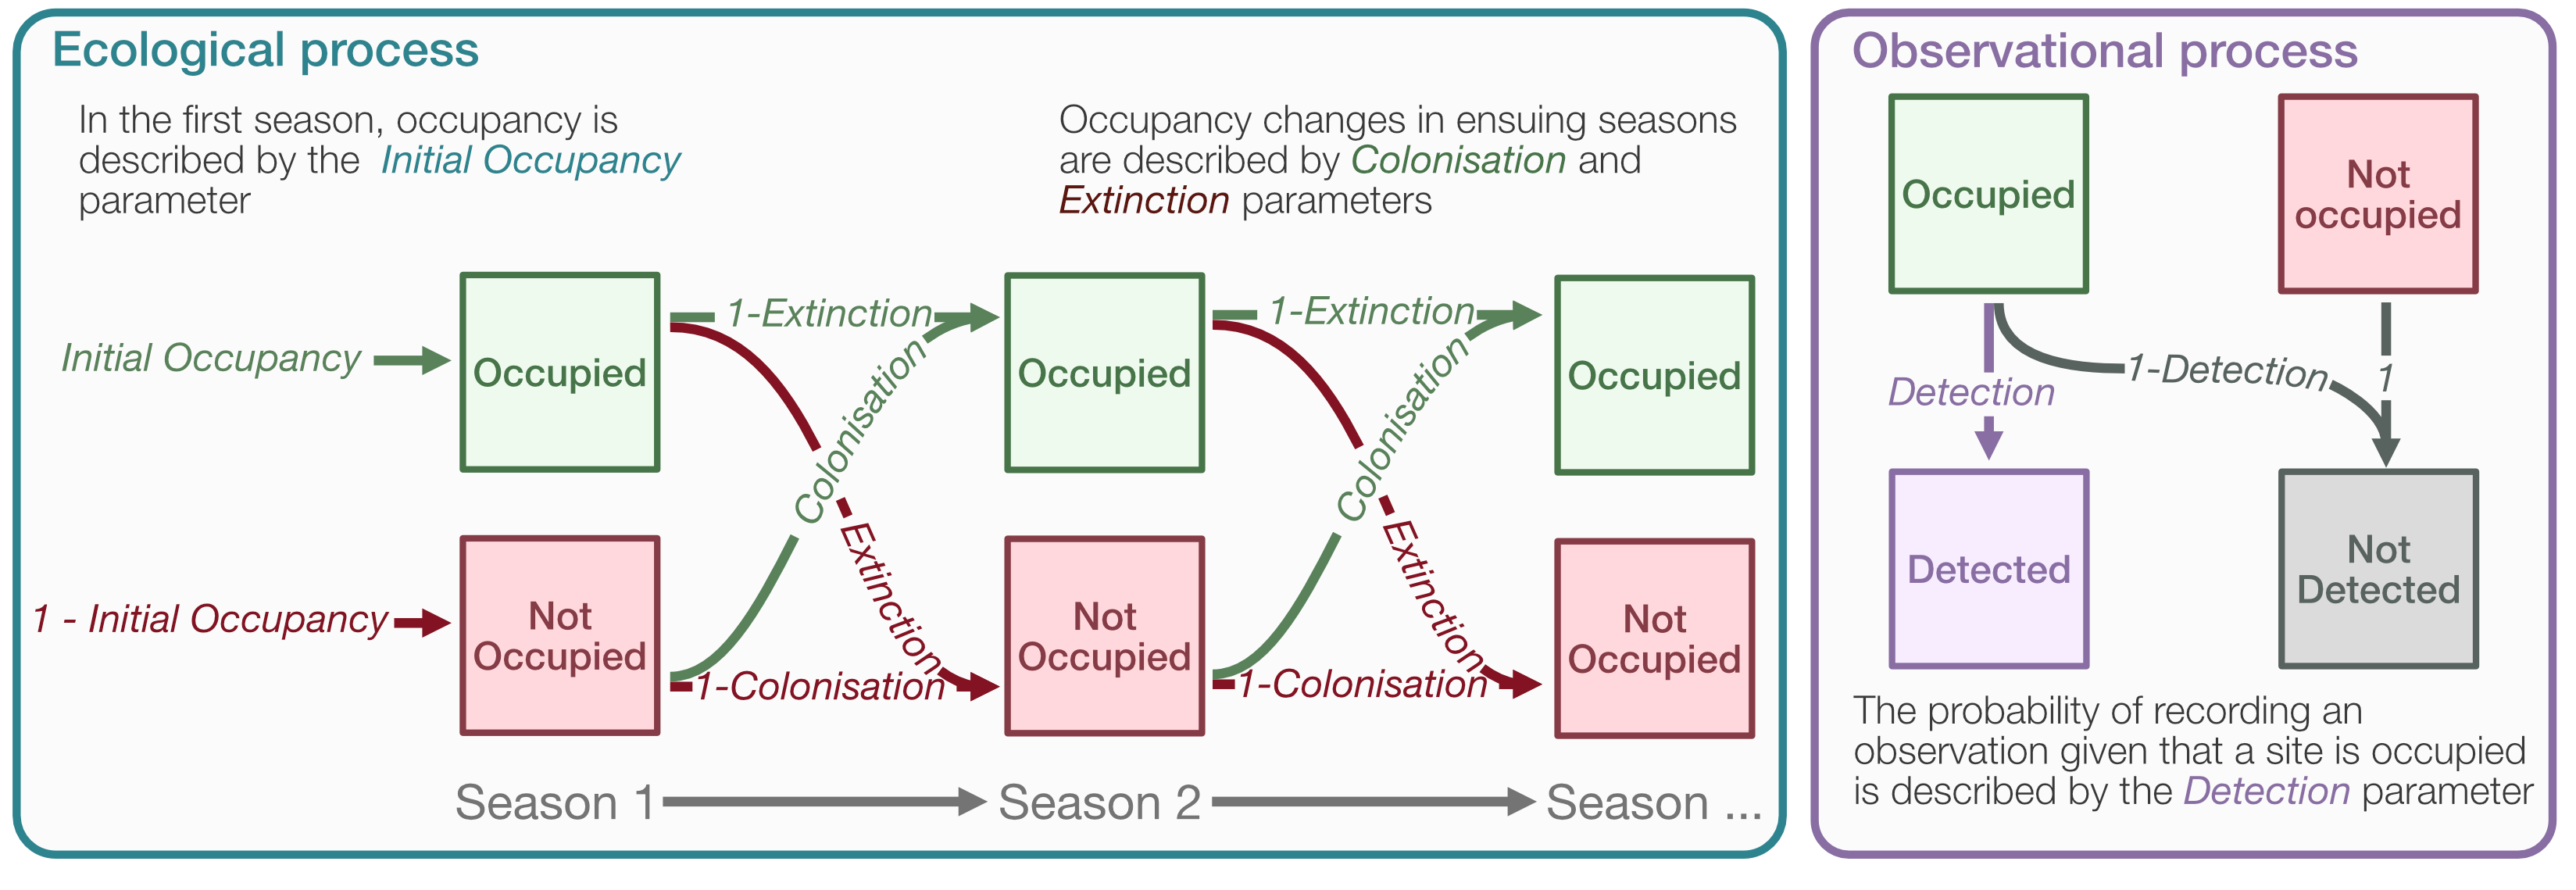
<figcaption>Figure 1: The dynamic occupancy model as described by <span class="citation" data-cites="mackenzie2003">MacKenzie et al. (<a href="#ref-mackenzie2003" role="doc-biblioref">2003</a>)</span>. In the ecological process submodel, the occupancy state of any given site is determined by the <em>initial occupancy</em> parameter. In subsequent time-steps, unoccupied sites may become occupied according to the <em>colonisation probability</em> and occupied sites may become unoccupied according to the <em>extinction probability</em>. The observational process submodel accounts for imperfect detection: during a survey at occupied site, the species may be detected or not according to the <em>detection probability</em>. At sites which are truly unoccupied, is it assumed that the species is never detected.</figcaption>
</figure>

To disentangle the ecological and observational processes the DOM requires a hierarchical sampling design as depicted in <a href="#fig-surveys" class="quarto-xref">Figure 2</a>. Under this design, observations at a site occur during distinct, time-bound seasons within which sites are considered closed to changes in occupancy. In each season multiple observations are conducted, permitting estimation of the probability of detection conditional on occupancy. Most frequently these repeat observations are collected by revisiting the site on separate occasions, although they can also be attained by alternative means: examples include conducting surveys at multiple locations within a site, using multiple observers during a survey, or recording the time elapsed until a detection is recorded ([MacKenzie et al., 2005](#ref-mackenzie2005)).

<figure id="fig-surveys">
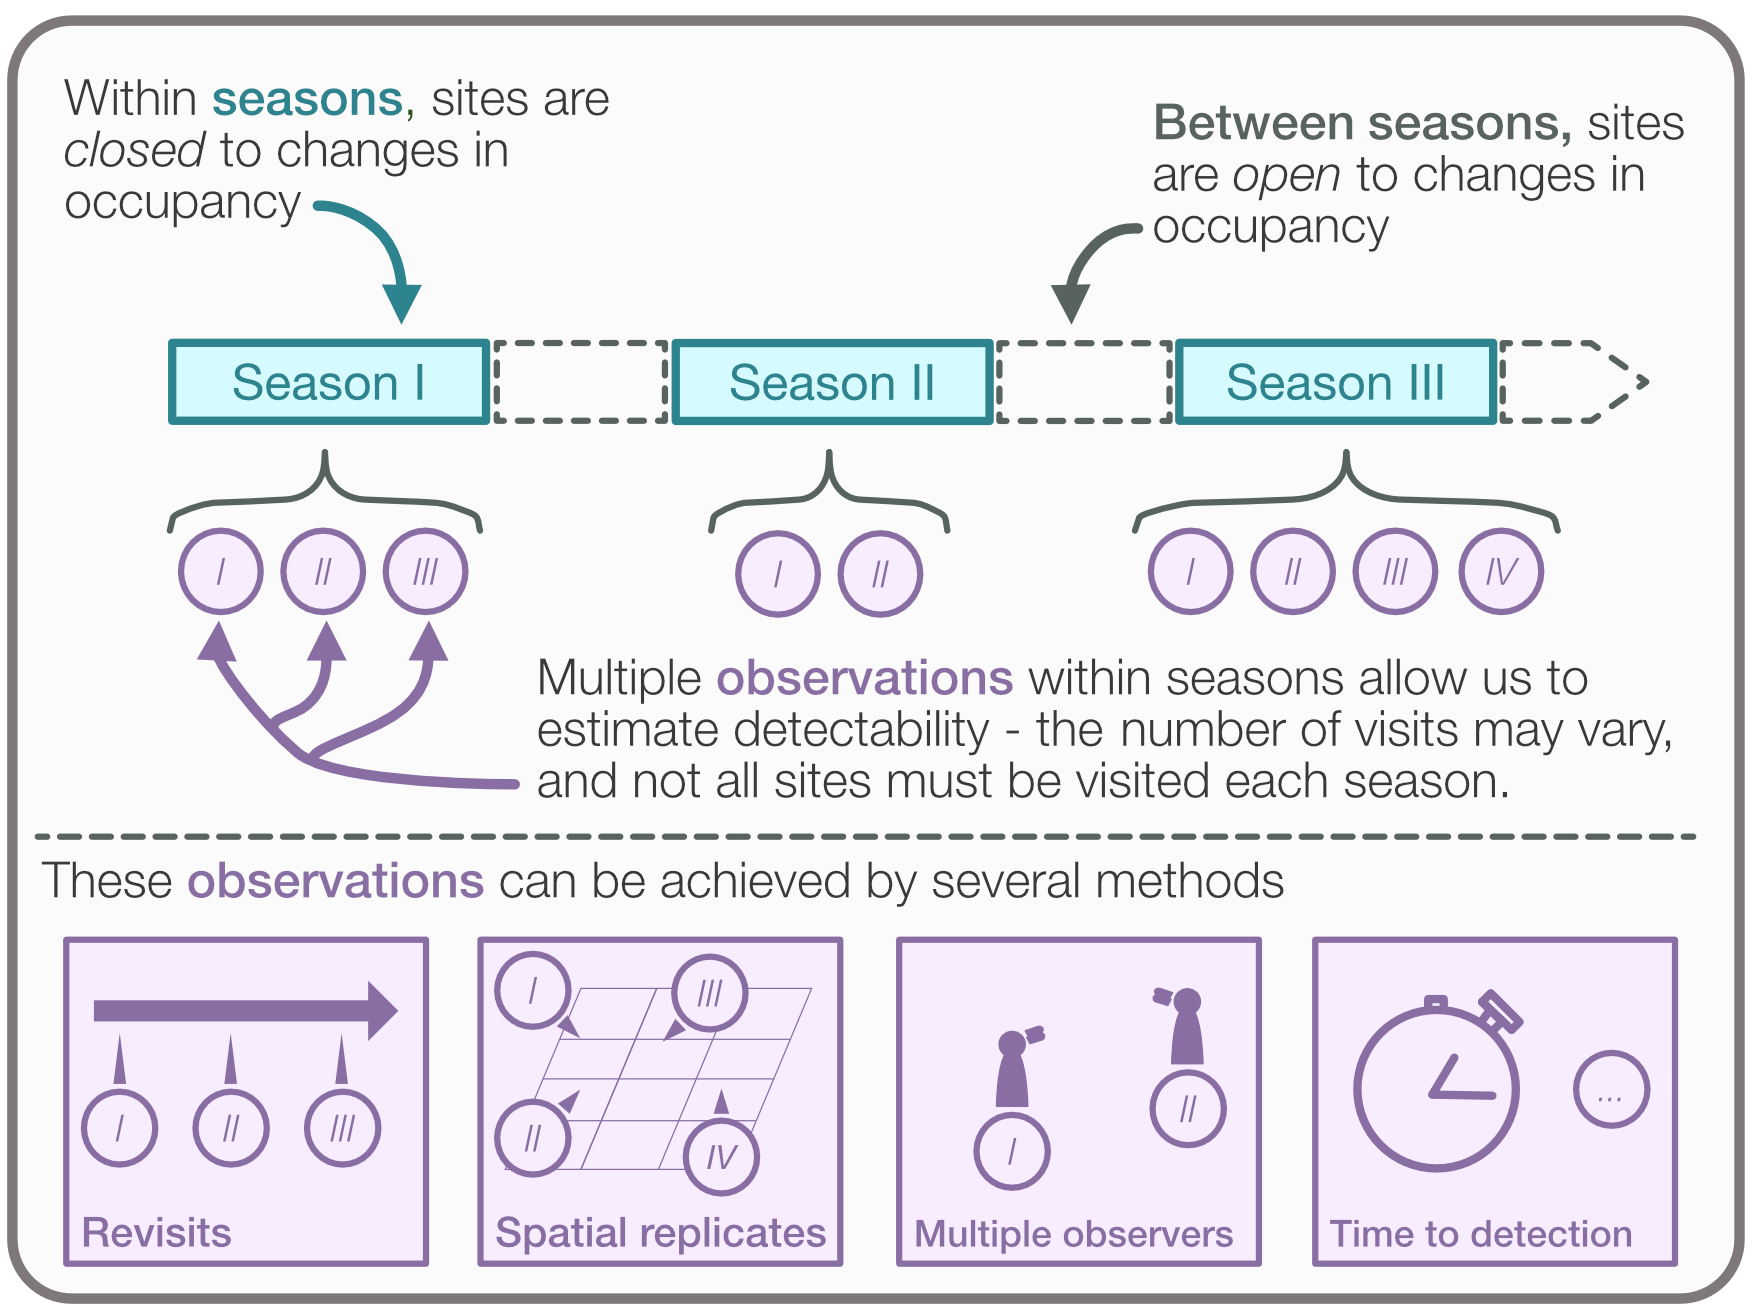
<figcaption>Figure 2: The sampling design of the standard dynamic occupancy model. During seasons, also called primary occasions, sites are considered closed to changes in true occupancy state; occupancy state may only change between seasons. Within each season, multiple observations (‘secondary occasions’) are conducted to record the observed presence or absence of the species at each site. These multiple observations may be recorded in many ways: sites can be revisited multiple times within a season, surveys can be conducted at multiple points within a larger site, multiple observers can conduct surveys contemporaneously, or the time elapsed prior to a detection occurring can be recorded. It is not necessary for the same number of observations to occur in each year or each site, allowing for greater flexibility in data inputs.</figcaption>
</figure>

The descriptions above are based on the original form of the dynamic occupancy model as prescribed in MacKenzie et al. ([2003](#ref-mackenzie2003)). Numerous model extensions and alternative formulations are also available, including implementations accounting for false positives ([D. Miller et al., 2011](#ref-miller2011); [D. A. W. Miller et al., 2015](#ref-miller2015); [Royle & Link, 2006](#ref-royle2006)), multiple states beyond occupied and unoccupied ([Nichols et al., 2007](#ref-nichols2007)), and jointly estimated multi-species models([Dorazio et al., 2010](#ref-dorazio2010)). For a comprehensive discussion of the most common extensions and their applications see Bailey et al. ([2014](#ref-bailey2014)), as well as Devarajan et al. ([2020](#ref-devarajan2020)) for a review of multi-species occupancy models.

Dynamic occupancy models make a small number of assumptions with important implications:

1.  **False positive detections do not occur**. While this assumption can be safely met in many studies, it is not necessarily guaranteed when working with more cryptic species or less reliable survey methods. McClintock et al. ([2010](#ref-mcclintock2010)) and D. A. W. Miller et al. ([2015](#ref-miller2015)) comment on the bias induced when false positives occur and are not accounted for, highlighting the need for authors to consider how certain their detections truly are. Significantly, even genuine detections of a species can be considered ‘false positives’ when they do not represent the intended definition of occupancy, such as detections of transient individuals when the intent is to estimate breeding occupancy ([Berigan et al., 2019](#ref-berigan2019)). Where this assumption can not reasonably met, aforementioned extensions designed to account for false positive error should be considered.

2.  **Sites are closed to occupancy between seasons.** This requirement, best known as the ‘closure assumption,’ has also been subject to considerable discussion around the bias which is introduced when it is violated ([Otto et al., 2013](#ref-otto2013); [Rota et al., 2009](#ref-rota2009)). Closure is dependent not only on the life history of the species, but also on the definition of occupancy used by researchers — short seasons may represent dynamics more representative of species ‘use,’ and Valente et al. ([2017](#ref-valente2017)) discuss the difficultly in distinguishing between temporary emigration and local extinction. Model extensions to relax the closure assumption have been developed, including Kendall et al. ([2013](#ref-kendall2013))’s approach using staggered arrival and departure periods between sites. A more pertinent approach for most studies, however, is careful consideration of ecologically relevant seasons corresponding to an appropriate definition of occupancy.

3.  **Heterogeneity in occupancy and detection is accounted for.** As with any approach for modelling species distributions, it is assumed that DOMs appropriately capture variation in occupancy patterns and species detectability across the study system. Generally, this is achieved by allowing model parameters to vary with respect to covariates representing environmental factors which may be expected to influence these characteristics. No model will fully account for the complexity inherent in patterns of species occupancy; however, failure to capture key drivers can introduce bias. Compared to the first two assumptions, this aspect of DOMs has been less thoroughly discussed and comparatively little is known how this latent heterogeneity can influence model estimates.

## Building dynamic occupancy models

A key aim of this review is to investigate how authors have approached the steps of the modelling building process, and how these practices have changed since the introduction of these models 20 years ago. The process of fitting DOMs requires decisions by model builders at several key points with meaningful implications for how outputs should be interpreted. This process begins with the project’s inception and plans for data collection. The definition of occupancy is contingent on

Authors must also consider the temporal aspect of occupancy by defining primary and secondary occasions. In many cases, this is a simple decision driven by data collection - take a typical bird survey program, where sites may be visited on a few occasions in the breeding season of each year; years and individual visits within years will generally be used as primary and secondary occasions, respectively. However, this choice may not be as clear with other data collection methods. Citizen science programs, camera traps, acoustic monitors can all yield somewhat continuous data which must be arbitrarily segregated into primary and secondary occasions. In this context, it is important to consider both the temporal scale of interest for occupancy and whether or not closure can reasonably be assumed between primary occasions.

Once data has been coerced into a suitable structure for fitting DOMs, modellers must also consider which environmental factors to incorporate into the model, as well as how to incorporate them. These factors will vary considerably by study, but should generally be plausible drivers of variation in either occupancy dynamics or survey observability. Determining which candidate covariates should be included in a final model for drawing inference will generally involve some form of model selection. Covariate selection can be particularly challenging for DOMs relative to other models like SDMs due to their increased complexity. Consider a model with 6 candidate covariates, each of which can be included in any parameter. The number of permutations of this model is given as (2<sup>n</sup>)<sup>p</sup>, where n is the number of candidate covariates and p the number of parameters. A simple single-parameter SDM would have 64 possible formulations, whereas a typical 4-parameter DOM would have over 16 million candidate models given the same covariate pool. For many studies, this precludes exhaustive comparisons of candidate models and demands some form of simplified model selection protocol ([Doherty et al., 2012](#ref-doherty2012)). Multi-model inference is also a common strategy with DOMs, allowing for uncertainty in the difference in fit by averaging estimates from across competing models ([Burnham & Anderson, 2004](#ref-burnham2004)).

Several computational tools exist for implementing the DOM and related models. Widely-cited frequentist options include the R package ‘unmarked’ and the GUI-based programs PRESENCE and MARK. Bayesian DOMs can be written in programs such as JAGS, BUGS, or STAN and fit via R packages such as rJAGS or brms*.* The recently developed R package ‘ubms’ offers a straightforward Bayesian implementation through an interface similar to *unmarked,* without requiring writing the DOM from scratch.

Upon selecting a final model, authors may evaluate model performance by different methods dependent on the objectives of their studies. While no dedicated goodness-of-fit test exists for DOMs, a version is available for single-season models ([MacKenzie & Bailey, 2004](#ref-mackenzie2004)) which has been extended to multiple seasons; functions are available in *unmarked* and *aicCmodavg.* Another possibility for assessing model fit and predictive ability is via validation. As true occupancy state is generally not known for DOM data, the typical response variable is the observed occupancy state.

# Systematic review methods

To assess how DOMs have been applied in the years since their introduction, we gathered a representative sample of articles fitting them to field ecological data. A pool of candidate articles was generated using two queries on Web of Science. The first included all articles from 2004-2023 citing MacKenzie et al. ([2003](#ref-mackenzie2003)). The second query searched articles matching “dynamic occupancy model\*”, “multi-season occupancy model\*”, and “occupancy dynamic\*” in any field, articles with each of “occupancy”, “colonization”, “extinction/persistence”, and “detection” in any field, and articles with the term “occupancy” near “dynamic”.

As we were interested in how DOMs use has changed through time, we divided articles across five four-year strata: 2004-2007, 2008-2011, 2012-2015, 2016-2019, and 2020-2024. From each of these strata we randomly selected 20 articles for inclusions in the review; articles which did not meet inclusion criteria were replaced from within their own strata.

Our review is focused on applications of the dynamic, multi-season occupancy model of MacKenzie et al. ([2003](#ref-mackenzie2003)) and its extensions. To reflect this, we included articles which fit a model meeting the following criteria:

1.  Uses non-simulated, field-collected presence-absence data.

2.  Describes multiple sites which can exist in at least two states including *occupied* and *unoccupied.*

3.  Has multiple seasons, between which sites may change states conditional on the prior season’s occupancy state and transition probabilities such as colonisation and extinction.

4.  Contains at least one parameter describing the detection process.

For each article we recorded key details on authorship, research objectives, study taxa and system, survey methods, and modelling approach. To assess patterns of authorship, the location of each article’s first author’s primary affiliation was recorded. *All* affiliations for all authors were classified into one of four categories: academic institutions, governmental organisations and institutes, non-governmental organisations, and private sector companies.

We recorded details on the type of taxa (bird, mammal, etc.) modelled in each article, and how multiple species were modelled where applicable. Taxa were denoted as threatened either when they are listed on the IUCN Red List of Species or when authors otherwise indicate that they are threatened. This deference to authors’ representation of conservation status was made to account for sub-species which lack listings or species which are of more local concern. Study locality and size was documented; the size of the study area being defined as the intended area of inference containing all sites, recorded as an order of magnitude to partially account for uncertainty in reporting.

To examine the reasons why authors used DOMs, we allocated each article to one or more category of objective based on the study’s stated aims. The possible categories were *Estimating parameters*, where authors express interest in estimates of site occupancy, colonisation, extinction, or detection probabilities; *Testing hypotheses*, where authors explore specific predefined relationships between covariates and model parameters; *Identifying drivers*, where authors attempt to find which covariates influence model parameters; *Generating predictions*, where authors estimate model parameters either for unsurveyed sites or under possible future conditions; and *Methods development*, where authors introduce, test, or demonstrate aspects of dynamic occupancy models.

Particular emphasis was placed on describing how authors conducted their modelling from covariate selection through model evaluation. We recorded all covariates considered in each study, regardless of whether they were or were not included in final models. Key traits of each covariate were recorded including their general category, whether they were directly observed or remotely sensed, whether they were static or varied between seasons, and how they were represented in the model (as a linear term, a polynomial term, or as part of an interaction with another covariate). Model selection procedures were sorted into non-exclusive categories including *A priori*, where only one model was considered; *candidate suite*, where a predefined set of models was considered; *procedural*, where covariates were selected parameter-by-parameter; *exhaustive*, where all possible model combinations were fit; *simple precursors*, where selection was preceded by another simpler model implementation; and *other*. Model evaluation was similarly categorised - options in this case included *goodness of fit*, where absolute metrics of fit were used; and *out-of-sample validation* and *in-sample-validation*, where predictive performance was evaluated using in-sample or out-of-sample data respectively. For the full spreadsheet of data collected and further details on categorisation, see **Appendix I.**

A total of 84 articles were included in this review. Based on the acceptance rate from the secondary sample, an estimated 448 of the 1066 articles in our sample would have met inclusion criteria (<a href="#fig-coverage" class="quarto-xref">Figure 3</a>).

<figure id="fig-coverage">
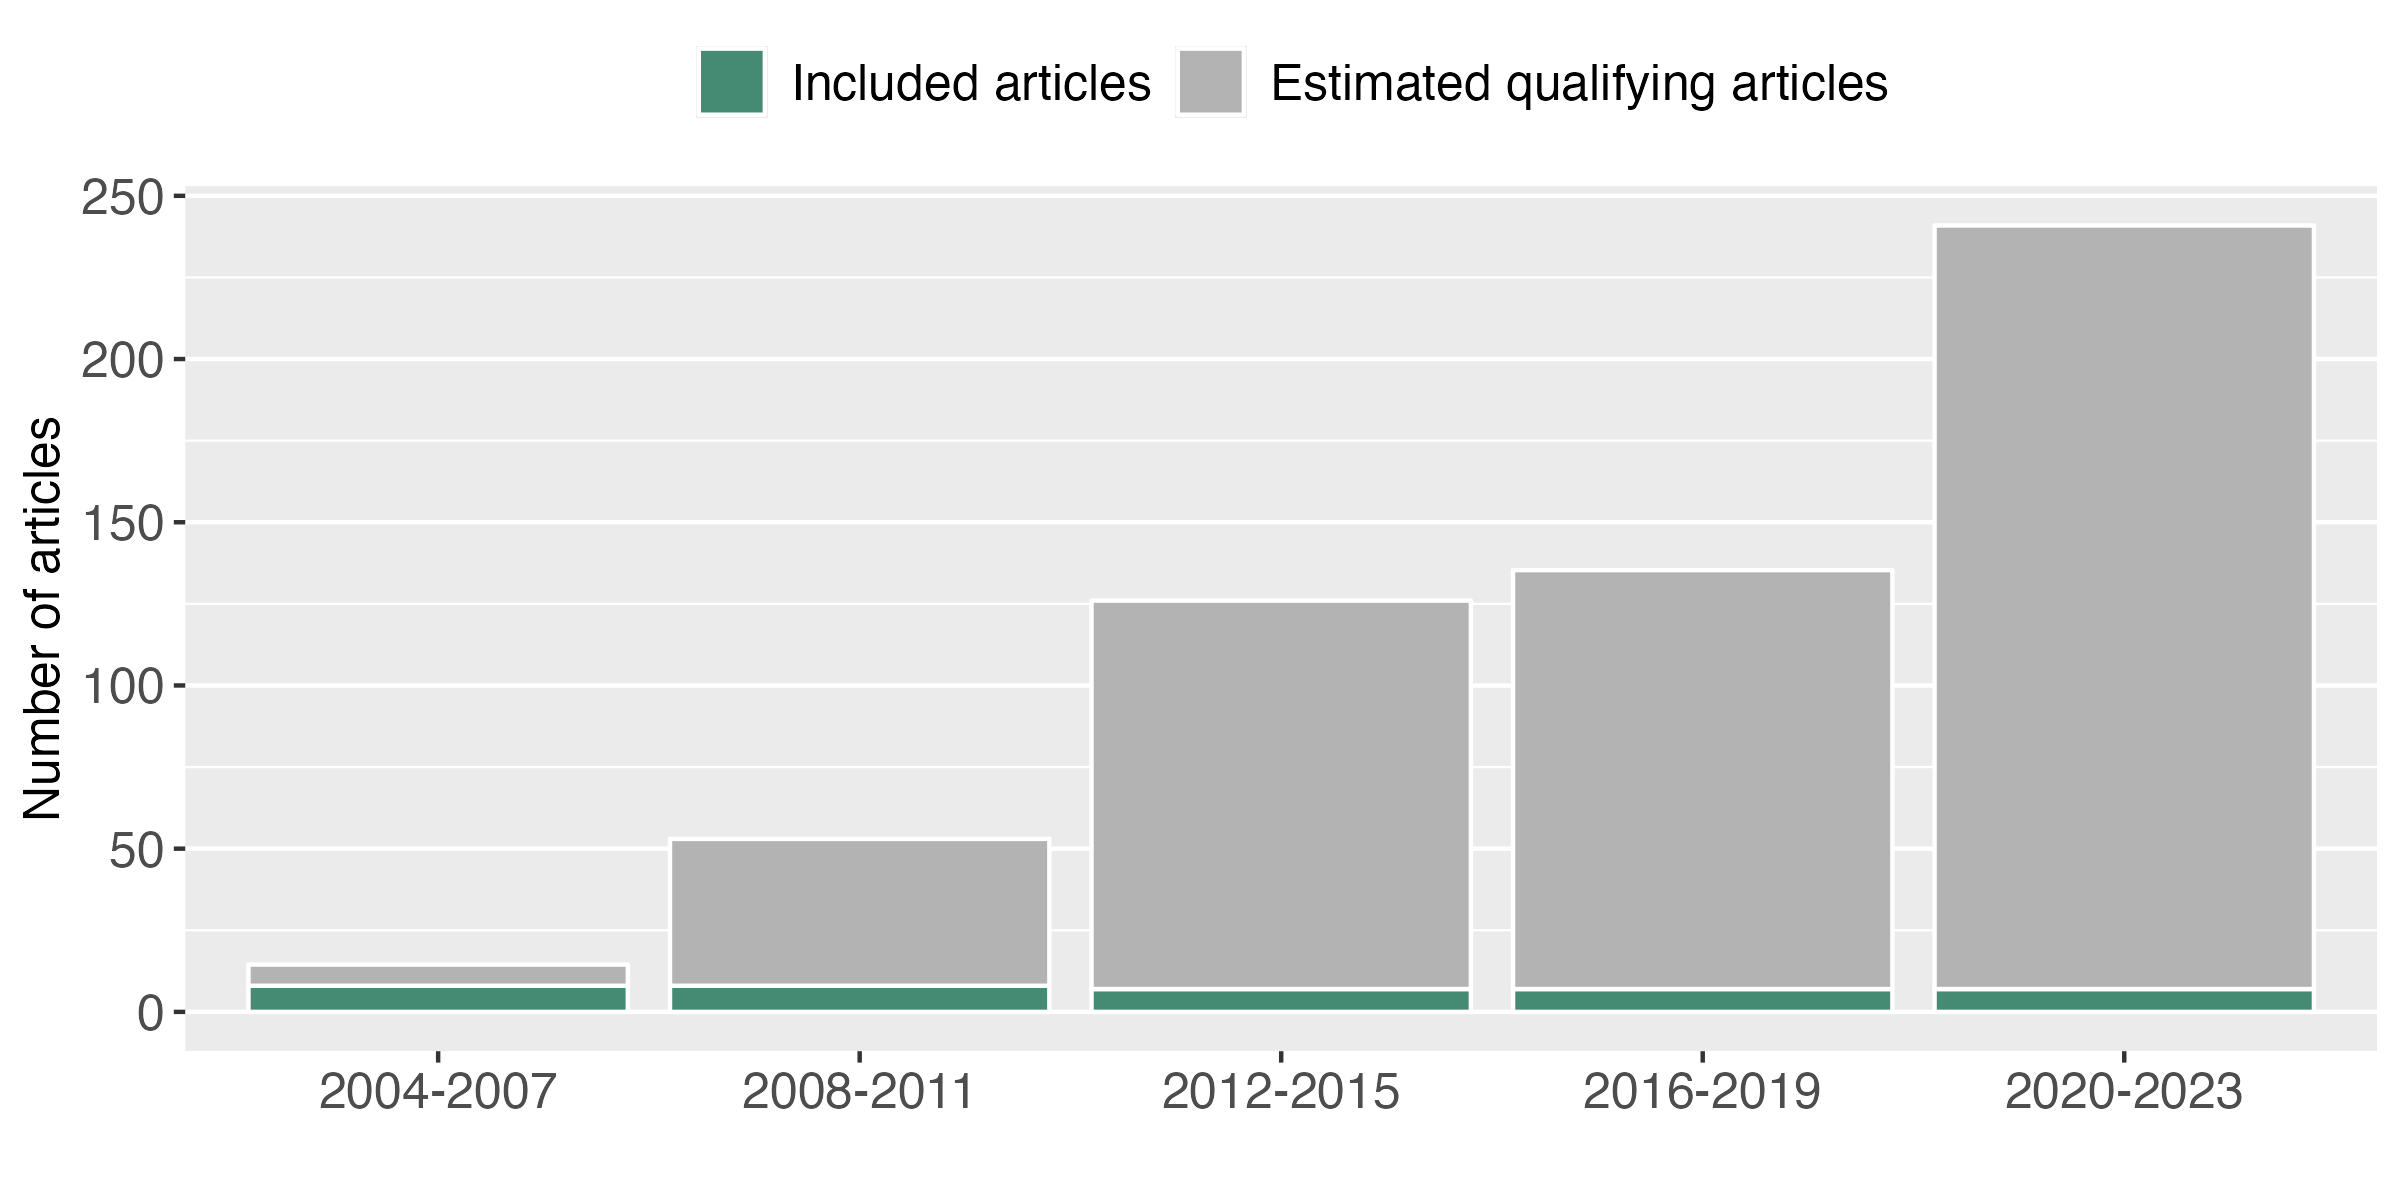
<figcaption>Figure 3: Estimated coverage of articles included in this review, based on the secondary sample’s rate of inclusion for each strata.</figcaption>
</figure>

# Applications of DOMs

Dynamic occupancy models are considerably flexible in many ways: they may used to achieve several different objectives, fit to presence-absence data from a variety of sources, and applied to studies at a wide range of spatial and temporal scales. Study locations included in our sample are globally distributed <a href="#fig-StudyDetails" class="quarto-xref">Figure 4</a> and span a diverse range of ecosystems. Notably, these study areas vary considerably in size — the smallest study locality included in our sample studied insect occurrence in a rainforest plot smaller than one square kilometre ([Basset et al., 2023](#ref-basset2023)), while the largest analysis modelled avian range shifts across the entire eastern half of the United States ([Clement et al., 2019](#ref-clement2019)).

<figure id="fig-StudyDetails">
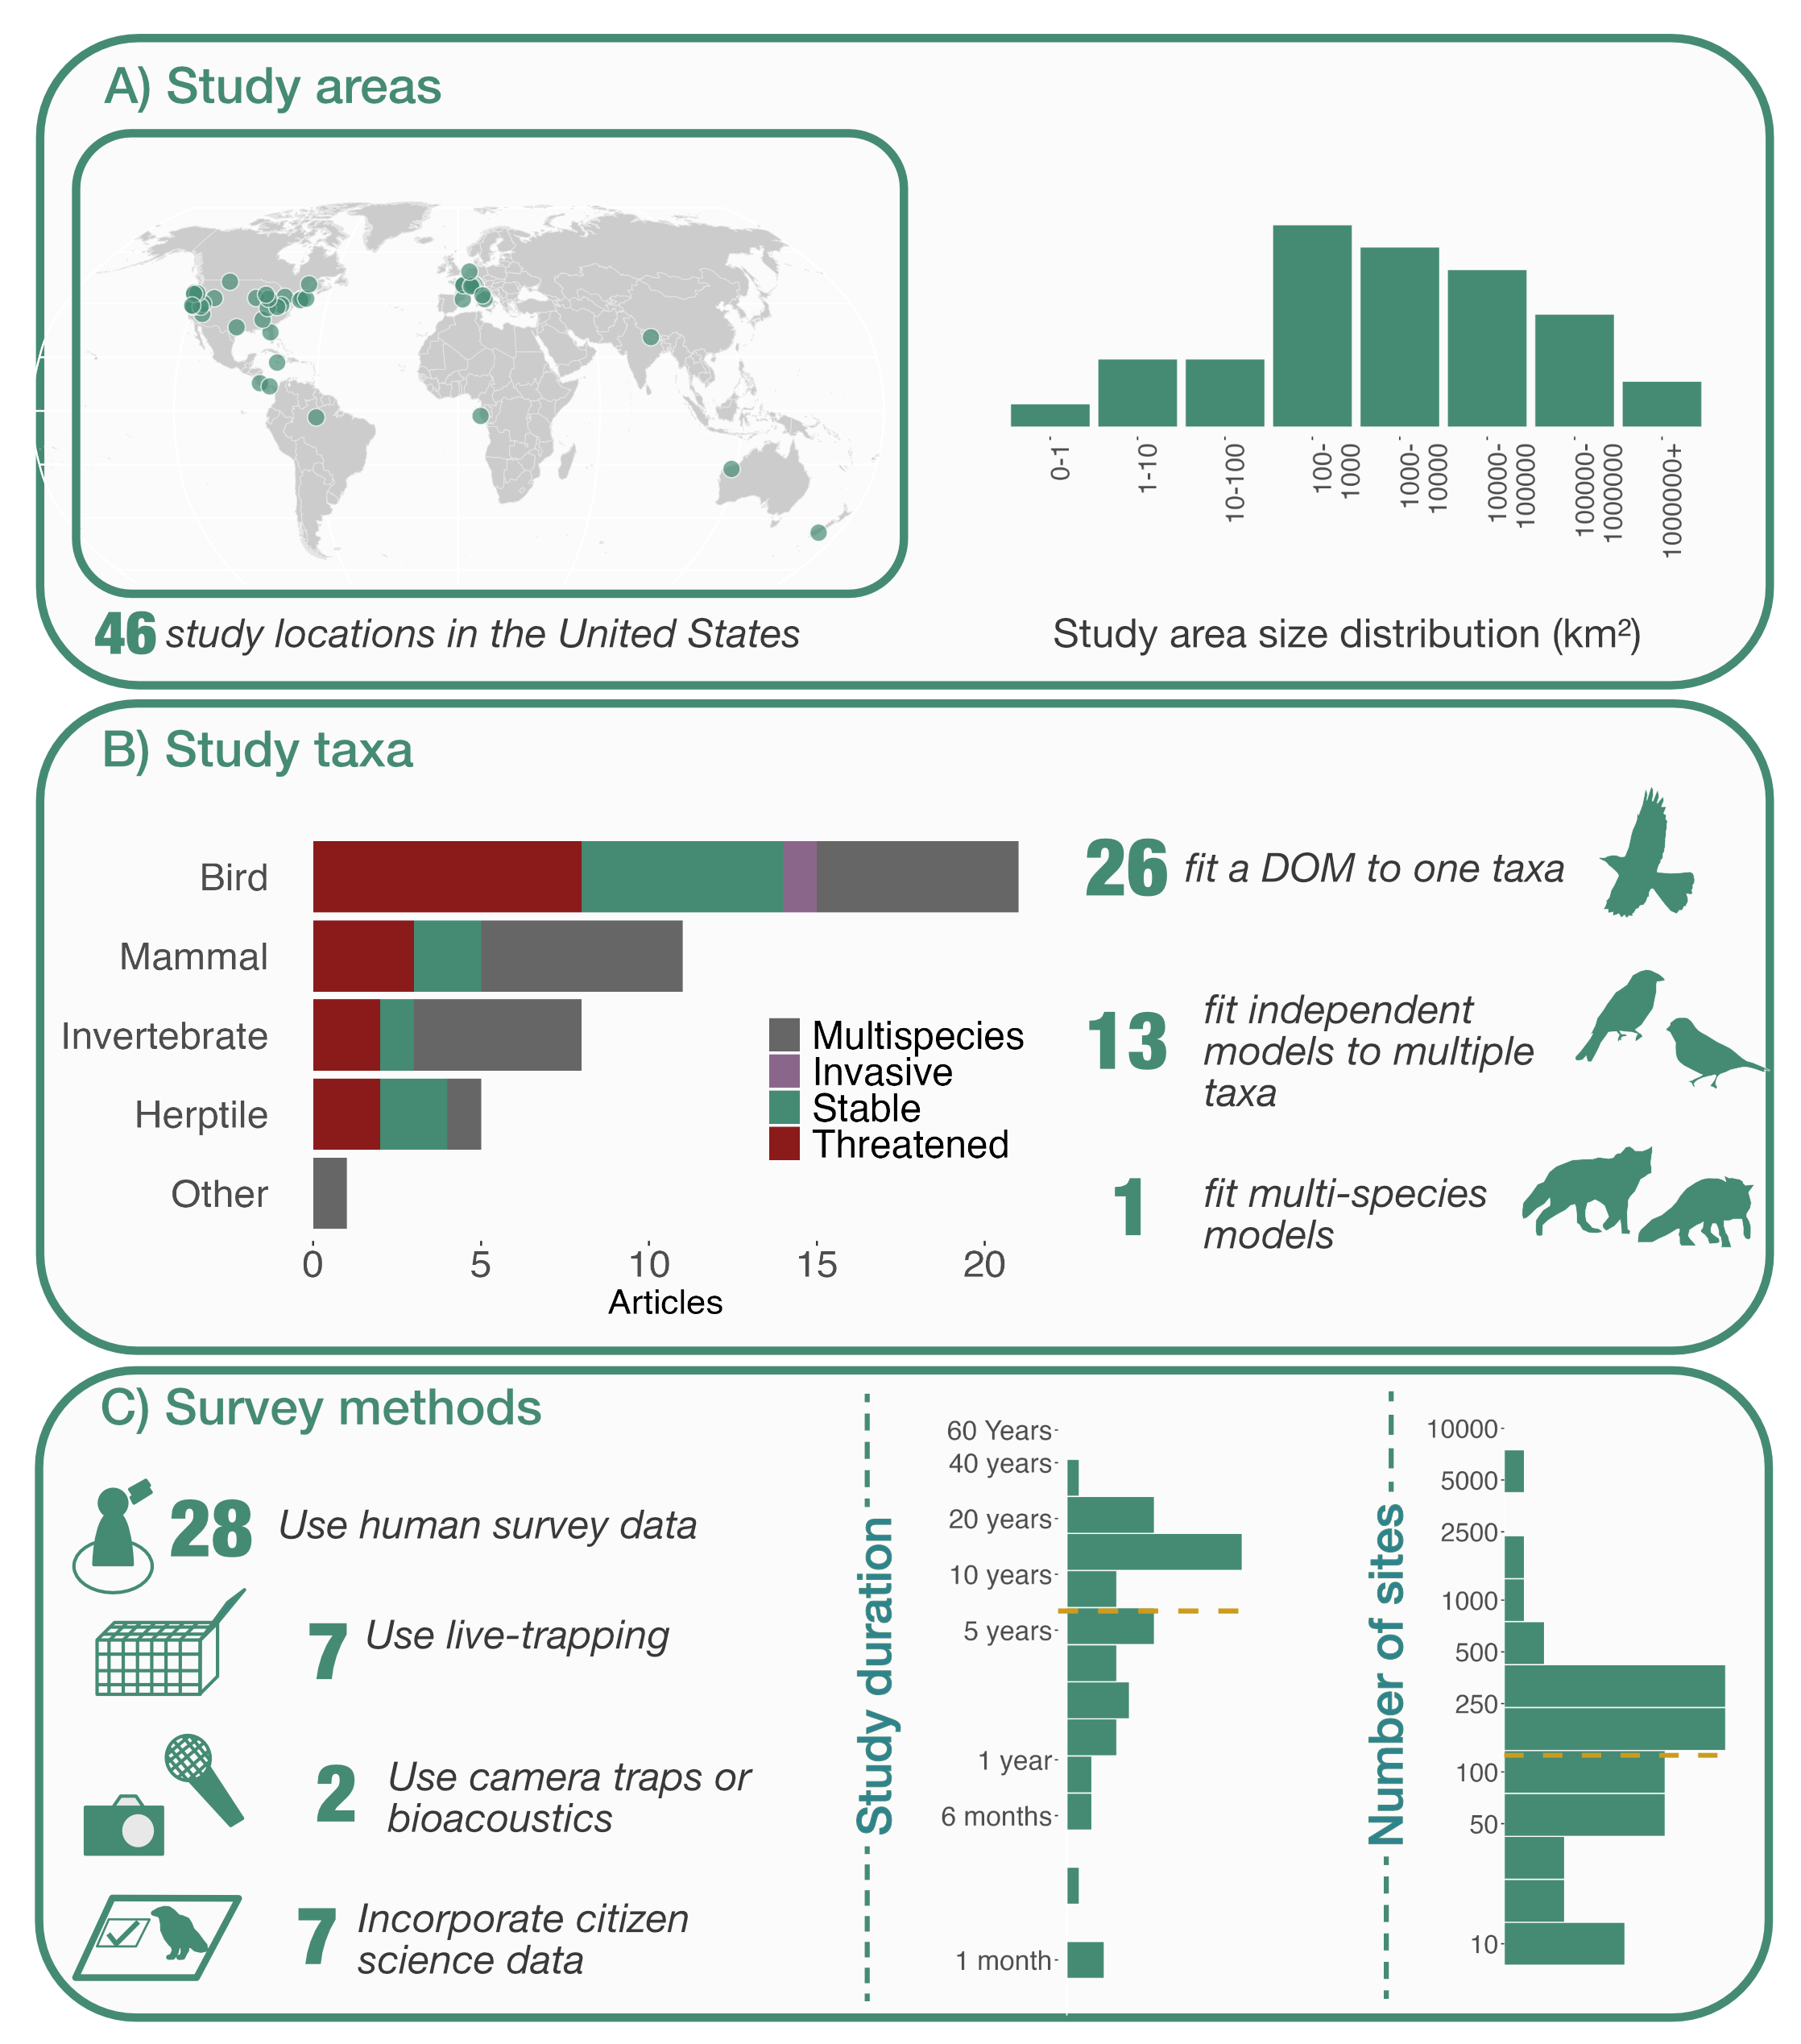
<figcaption>Figure 4: A) Study areas: Data for a majority of studies were collected from study locations in the United States. The size of study areas was log-normally distributed, with the median study area falling between 1000 and 10000 square kilometres. B) Study taxa: Most species modelled in our sample were terrestrial vertebrates including birds, mammals, or herptiles. 50 articles fit models to only a single taxa, 26 fit independent models to multiple taxa, and 8 fit multi-species models with explicit interactions between taxa. C) Survey methods: Approaches to data collected were varied and included conventional surveys like point counts and transects as well as more modern methods like camera traps and acoustic monitors. 10 articles incorporated data from citizen science projects. Project scale was also variable, with the median study running for 3.25 years and covering 98 sites.</figcaption>
</figure>

### Focal systems

Although studies were conducted in 21 countries and on all continents except for Antarctica, the majority of reviewed articles used data collected in the United States of America. This strong geographic trend starkly contrasts with SDMs far more international reach; M. B. Araújo et al. ([2019](#ref-araújo2019))‘s review of SDM applications found that no more than 20% of studies came from any single continent. The reasons behind this disparity are unclear, but a possible explanation could relate to the DOM’s roots in the mark-recapture literature and a history of publication in American journals. These differences in where users conduct their research may also contribute to the seemingly limited overlap between these models’ respective bodies of literature.

DOMs have more rarely been applied to non-animal organisms, perhaps due to a reduced emphasis on imperfect detection outside of the wildlife modelling community. However, there are exceptions — Belinchón et al. ([2017](#ref-belinchón2017)) fits a DOM to lichen data, and Cook et al. ([2022](#ref-cook2022)) uses them to model the spread of chronic wasting disease. The latter’s application to disease dynamics is not unique, and DOMs have been a reasonable choice for modelling disease dynamics. Mores et al. ([2020](#ref-mores2020)) and Padilla-Torres et al. ([2013](#ref-padilla-torres2013)) have each used DOMs to model mosquito dynamics due to their importance as a human disease vector, and Bailey et al. ([2014](#ref-bailey2014)) discusses the feasibility of applying the DOM to study the spread of chytrid fungus in amphibian habitat.

Differences in use between SDMs and DOMs are also evident in the species targeted for modelling. Where SDMs show broader coverage of plants, invertebrates, and aquatic species ([M. B. Araújo et al., 2019](#ref-araújo2019)), 93% of studies in our sample of DOMs modelled terrestrial vertebrate fauna with Belinchón et al. ([2017](#ref-belinchón2017))’s study on lichen the sole non-animal taxa representative. These differences are most easily explained by the DOM’s emphasis on imperfect detection, a concern which is less prioritised (though not non-existent ([Chen et al., 2013](#ref-chen2013))) in studies on non-mobile species like plants. We find DOMs have been frequently used to model threatened taxa (32% of studies) and invasive species (11% of studies), taxa for which they may be expected to excel due to their more explicit handling of changes in occupancy. One group for which DOMs have only rarely been used is aquatic species, as in Fisher et al. ([2014](#ref-fisher2014))’s application to invasive salmon or Falke et al. ([2012](#ref-falke2012))’s model on Great Plains stream fishes.

While most articles focus on a single taxa, 40% of the studies in our sample fit models to more than one taxa (‘taxa’ defined here as one or more species modelled as one). Of these, 75% fit independent DOMs to multiple species, and 25% fit explicitly multi-species implementations. These multi-species models varied in structure: some use species-specific effects to describe metapopulations by including hundreds of species in a single model ([Dorazio et al., 2010](#ref-dorazio2010); [Hendershot et al., 2020](#ref-hendershot2020)), while others fit models which explicly account for species interactions and estimate conditional occupancy, colonisation, extinction, and detection ([Fidino et al., 2019](#ref-fidino2019); [Lesmeister et al., 2015](#ref-lesmeister2015)). While they did not fit multi-species models, several other authors fit large numbers of independent models to different species ([Otto & Roloff, 2012](#ref-otto2012); [Peach et al., 2019](#ref-peach2019)). Working with large numbers of taxa does raise additional questions, as the level of complexity which can realistically be applied to each individual taxa is likely to be reduced for practicality’s sake. With multi-species community frameworks, environmental covariates must be relatively general; and when fitting large numbers of independent models covariate selection processes are likely to be more restricted due to computational limitations.

### Data collection and inputs

DOMs show exceptional diversity in the scales at which they can be implemented. The smallest study area in our sample was less than one kilometre squared, and the largest over one million. Study duration shows similar variation — data collection ran for for less than a month in the shortest study, and for 40 years in the longest, with a median duration of 3.25 years. This reiterates the flexibility of dynamic occupancy models, with explorations of hyper-local patterns of occupancy and analyses of continental-scale distribution using the same underlying model structure. The detection data collected from these surveys came from a variety of detection methods: 69% of articles used human observations, 20% conducted live trapping, 12% used camera traps, and 1% used bioacoustic monitors (<a href="#fig-StudyDetails" class="quarto-xref">Figure 4</a>).

The flexibility of DOM inputs data allows for creative uses of detection data from a range of sources. Marescot et al. ([2020](#ref-marescot2020)) models a relationship between wildlife and human poachers, using ranger-reported signs of poacher activity to create detection histories. In a rare example of a DOM applied to a marine species, Pendleton et al. ([2022](#ref-pendleton2022)) uses aerial transects broken up into grid cells to study the occupancy dynamics of whales in the Northeastern United States.

Notably, many reviewed articles use data which was not originally collected in a robust design framework for occupancy modelling. In these articles, authors manipulated their data into a hierarchical format post-hoc using a variety of methods. Some defined primary seasons as a discrete time interval, treating all surveys occurring within the season as secondary occasions. Others defined sites as larger grid cells, treating any survey falling within the grid as a spatial replicate. These manipulations permit authors to use data which far predate the DOM, with one study using surveys from as far back as 1908 to model century-long changes in occupancy ([Riddell et al., 2021](#ref-riddell2021)).

Additionally, not all articles rely on a single source of detection data - some integrate multiple sources of data to maximise sample size, combining data from camera traps, sign surveys, and citizen science reports. These integrated detection method models do require additional care in estimating detection probability, which is generally expected to vary based on observation method; however, this can be reasonably achieved by including survey method as a covariate on detection probability ([Pitman et al., 2017](#ref-pitman2017); [Warrier et al., 2020](#ref-warrier2020)). A special case exists when different detection methods are used where one has the potential for false positive detections; e.g., where less-certain citizen science detections are combined with certain detections from field surveys. In this context, the certain detections are used to help account for false-positive detection probability, as in D. Miller et al. ([2011](#ref-miller2011))’s study integrating GPS collars and hunter reports to estimate wolf occupancy in Montana.

It is important to note that the data input requirements for dynamic occupancy models are not as arduous as may be commonly perceived. While it *is* necessary to record multiple observations at individual sites, this does not necessarily require that data be collected according to a strict, preconceived sampling scheme. Post-hoc manipulation of other data such as long-term citizen monitoring programs ([Peach et al., 2019](#ref-peach2019); [Zuckerberg et al., 2011](#ref-zuckerberg2011)), disparate agency modelling programs ([McGowan et al., 2020](#ref-mcgowan2020)), or camera trapping data ([Davis et al., 2018](#ref-davis2018)) is feasible with careful consideration. In one example, Riddell et al. ([2021](#ref-riddell2021)) used data from as long ago as 1908 by treating grid cells as sites and counting historical surveys within each cell as repeat observations. In a similar vein, all detection data does not necessarily need to come from the same source — detections from multiple methods, with associated variation in detection probabilities, may be incorporated within a single model

Such broadness and flexibility in data inputs is not amenable to a one-size-fits-all definition of occupancy. Authors must carefully consider precisely what they are modelling and address questions on the ‘scale’ represented by their model ([Chave, 2013](#ref-chave2013)). Drivers of occupancy may differ depending on whether a site is represented by a single point on the landscape or as a grid cell, with the former likely to depend on more local, small scale factors rather than landscape-level trends ([Stevens & Conway, 2019](#ref-stevens2019)). This is also true for the *temporal* scale of occupancy: whether a site is occupied within a week or within a year is a non-arbitrary distinction representing vastly different conceptions of occupancy. This discussion is particularly pertinent in cases where the selection of season length *is* to some extent arbitrary, as with camera-trap or bioacoustic data where continuous recordings can be broken down into distinct ‘seasons’ of any length. DOMs are well suited to these data types ([Balantic & Donovan, 2019](#ref-balantic2019)), and the proliferation of autonomous survey techniques provides novel opportunities for analysis that is simply not possible with human-collected data. For example, Kleiven et al. ([2020](#ref-kleiven2020)) and Mölle et al. ([2022](#ref-mölle2022)) divide their camera trap records into seasons of just a few days. While this provides exciting insights of occupancy at extremely fine temporal scale, further research is needed on how to determine appropriate season and survey durations with respect to research questions.

### Objectives and applications

Authors have used the DOM in many ways to achieve their research aims. The most frequent objective for studies using DOMs was hypothesis testing, with 50% of authors expressing interest in a specific relationship. 31% were interested in identifying nondescript drivers of occupancy, 30% in estimating models parameters like occupancy themselves, and 29% worked to develop and expand on methods for DOMs. Just 10% of authors expressed interest in making predictions to unsurveyed locations or into the future. The DOMs ability to make predictions has been often underexploited in the existing literature, given its noted potential for forecasting occupancy in non-equilibrium scenarios ([Briscoe et al., 2021](#ref-briscoe2021); [Kéry et al., 2013](#ref-kéry2013)). Articles which *do* make predictions provide some of the most directly applicable outputs found in the review sample. As examples, McGowan et al. ([2020](#ref-mcgowan2020)) provides projections for a threatened species under multiple putative management scenarios, and Pollentier et al. ([2021](#ref-pollentier2021)) generates maps of distributions resembling those made with species distribution models (SDMs).

The authors of the studies captured in our sample come from a variety of backgrounds. 86% of articles had at least one author based at an academic institution, 46% had author(s) at government institutions and 25% had author(s) from non-profit organisations. The high proportion of articles with government and NGO participants suggests an applied focus for many users of DOMs. This has important implications: when a model is used to assess a critically endangered species ([Carvalho et al., 2023](#ref-carvalho2023)), guide public health management of a disease vector ([Mores et al., 2020](#ref-mores2020)), or track rapidly-developing biological invasions ([Wood et al., 2020](#ref-wood2020)), it is imperative that models can be trusted to accurately represent a system. Regardless of the reasons why they turn to the DOM to analyse their data, authors must navigate the model building process.

# Practices in implementing DOMs

Approaches to building any type of model will necessarily depend on the possibilities of the data at hand and on the priorities of the model-builder. This precludes any prescription of the ‘best’ way to build a model; however, there may still be commonalities in the modelling workflow. The modelling process for both DOMs and SDMs can be divided into a few components. First, based on prior knowledge and ecological theory a suite of covariates with hypothetical relationships with model parameters is assembled. Next, some form of model selection procedure is followed to identify either a single optimal model, or an ensemble of suitable models to be used to make conclusions. Following this, a model’s performance should be somehow assessed so that the validity of conclusions can be adequately judged. In this section we examine how DOM users have approaches each of these stages, and make comparisons to common practice in the more extensive SDM literature.

### Model complexity

‘Complexity’ is a broad term which encompasses many aspects of a model ([Merow et al., 2014](#ref-merow2014)). Opinions on simple versus complex models can be divided - some advocate for the simplest possible models, arguing that they are most generaliseable; others insist that overly-simple models cannot adequately represent the most important drivers in a system ([Evans et al., 2013](#ref-evans2013); [Lonergan, 2014](#ref-lonergan2014)). To account for imperfect detection and describe change in occupancy, DOMs must be somewhat more complex relative to static correlative occupancy models. This added complexity helps mitigate the bias introduced when important elements like imperfect detection are ignored. Within DOMs, however, further complexity is to some degree up to the modeller: they can choose how many covariates to consider for inclusion on the various parameters, and how to represent the nature of the relationship between those covariates and parameters.

The variation in the quality of covariates considered for each model parameter amongst our reviewed articles is shown in <a href="#fig-covariates" class="quarto-xref">Figure 5</a>. Notably, many studies expressed some parameters as a constant without including any covariates: of the four standard model parameters initial occupancy has the most articles considering zero covariates (35%) and detection probability the least (19%). A lack of any covariates on the initial occupancy parameter raises some questions. Presumably any taxa will have some amount of non-random variation in how it is distributed across a landscape; by expressing initial occupancy as a constant this heterogeneity is not captured. Omission of factors which drive occupancy can introduce bias into SDMs ([Barry & Elith, 2006](#ref-barry2006)). Initial occupancy is itself effectively a static correlative SDM, and the effects of poorly estimating this parameter on predicted occupancy in ensuing seasons is uncertain but unlikely to be favourable.

<figure id="fig-covariates">
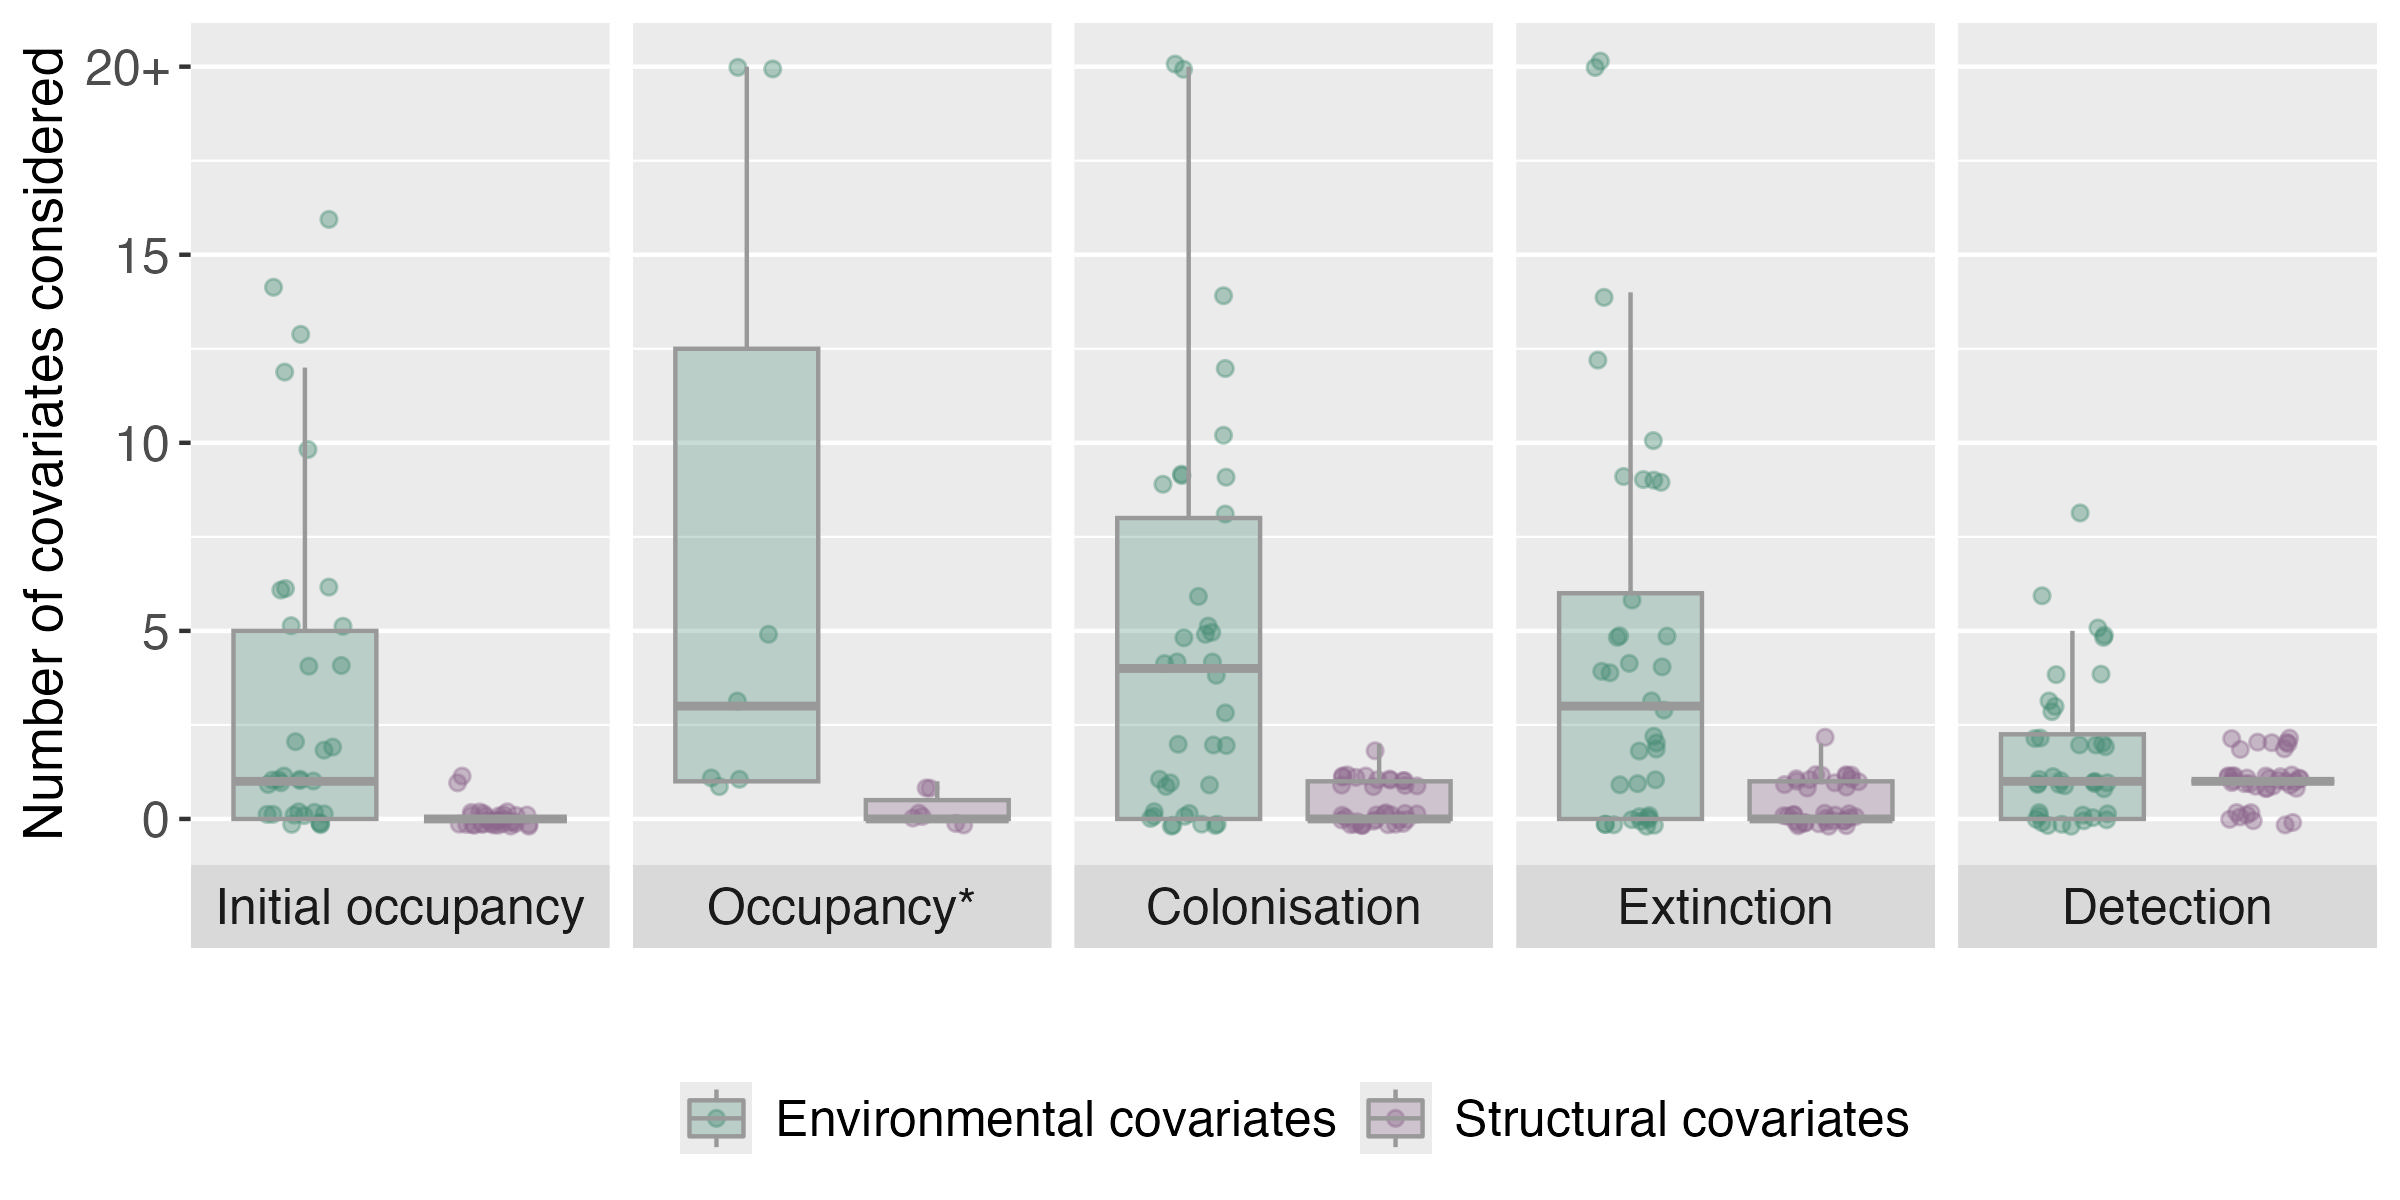
<figcaption>Figure 5: Distribution of covariate quantity considered for each model parameter.</figcaption>
</figure>

The types of covariates which were considered for modelling were also wide-ranging, and a summary of their inclusions in articles is presented in <a href="#tbl-covariates" class="quarto-xref">Table 1</a>. The most frequently used covariates described aspects of habitat, with 57% of articles considering these terms for at least one parameter. Data for covariates may be either collected directly, requiring measurement at individual sites, or indirectly via remote sensing — where directly measured covariates may offer more direct insights, indirect measurements are far more easily projected to unsurveyed sites when making predictions ([M. P. Austin, 2002](#ref-austin2002)). Some covariates, like biotic interactions, must nearly always be measured at sites, while others such as climate and weather covariates are generally indirectly observed. There is variation in which covariates are most likely to be dynamic and change through time.

``` r
library(tidyverse)
```

    ── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
    ✔ dplyr     1.1.4     ✔ readr     2.1.5
    ✔ forcats   1.0.0     ✔ stringr   1.5.1
    ✔ ggplot2   3.5.1     ✔ tibble    3.2.1
    ✔ lubridate 1.9.3     ✔ tidyr     1.3.1
    ✔ purrr     1.0.2     
    ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
    ✖ dplyr::filter() masks stats::filter()
    ✖ dplyr::lag()    masks stats::lag()
    ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

``` r
library(gt)

covTable <- read_csv("Figures/CovariateTable.csv")
```

    Rows: 25 Columns: 12
    ── Column specification ────────────────────────────────────────────────────────
    Delimiter: ","
    chr  (2): Covariate, Category
    dbl (10): Prop_Any, Colonisation, Extinction_Persistence, Detection, Initial...

    ℹ Use `spec()` to retrieve the full column specification for this data.
    ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

``` r
covTable |>
  arrange(Category, -Prop_Any) |>
  gt(rowname_col = "Covariate", groupname_col = "Category") |>
  tab_options(
    row_group.as_column = TRUE
  ) |>
  tab_row_group(
    label = md("Environmental"),
    rows = Category == "E",
    id = "Env"
  ) |>
  tab_row_group(
    label = md("Structural"),
    rows = Category == "S",
    id = "Struct"
  ) |>
  tab_row_group(
    label = md("All"),
    rows = Category == "O",
    id = "All"
  ) |>
  tab_style(
    style = cell_fill(color = "#82AD8E"),
    locations = cells_row_groups(groups = "Env")
  ) |>
  tab_style(
    style = list(
      cell_fill(color = "plum4")
    ),
    locations = cells_row_groups(groups = "Struct")
  ) |>
  tab_style(
    style = list(
      cell_fill(color = "gray60")
    ),
    locations = cells_row_groups(groups = "All")
  ) |>
  row_group_order(groups = c("Env", "Struct", "All")) |>
  tab_spanner(label = "Articles with covariate on:",
              columns = c("Prop_Any", "Initial occupancy", "Occupancy",
                          "Colonisation", "Extinction_Persistence",
                          "Detection"),
              id = "inclusions") |>
  tab_spanner(label = "Covariates which are:",
              columns = c(Prop_Dynamic, Prop_Direct),
              id = "covariates") |>
  tab_spanner(label = "Articles representing with:",
              columns = c(Prop_Nonlinear, Prop_Interact),
              id = "representations") |>
   cols_label(
    Prop_Any = "Any parameter",
    `Initial occupancy` = html("&psi;1"),
    Occupancy = html("&psi;"),
    Colonisation = html("&gamma;"),
    Extinction_Persistence = html("&epsilon;"),
    Detection = html("&rho;"),
    Prop_Dynamic = "Dynamic",
    Prop_Direct = "Directly observed",
    Prop_Nonlinear = "Non-linear",
    Prop_Interact = "Interaction"
  ) |>
  text_case_match(
    "Environmental" ~ md("*Any Environmental*"),
    "HABT" ~ "Habitat type",
    .locations = cells_stub()
  ) |>
  cols_hide(Category) |>
  fmt_percent(decimals = 0) |>
  sub_missing(missing_text = "-") |>
  as_raw_html()
```

<div id="ycsdbiyuki" style="padding-left:0px;padding-right:0px;padding-top:10px;padding-bottom:10px;overflow-x:auto;overflow-y:auto;width:auto;height:auto;">
  
  

|  |  | <span class="gt_column_spanner" style="border-bottom-style: solid; border-bottom-width: 2px; border-bottom-color: #D3D3D3; vertical-align: bottom; padding-top: 5px; padding-bottom: 5px; overflow-x: hidden; display: inline-block; width: 100%;">Articles with covariate on:</span> |  |  |  |  |  | <span class="gt_column_spanner" style="border-bottom-style: solid; border-bottom-width: 2px; border-bottom-color: #D3D3D3; vertical-align: bottom; padding-top: 5px; padding-bottom: 5px; overflow-x: hidden; display: inline-block; width: 100%;">Covariates which are:</span> |  | <span class="gt_column_spanner" style="border-bottom-style: solid; border-bottom-width: 2px; border-bottom-color: #D3D3D3; vertical-align: bottom; padding-top: 5px; padding-bottom: 5px; overflow-x: hidden; display: inline-block; width: 100%;">Articles representing with:</span> |  |
|:---|:---|---:|---:|---:|---:|---:|---:|---:|---:|---:|---:|
|  |  | Any parameter | ψ1 | ψ | γ | ε | ρ | Dynamic | Directly observed | Non-linear | Interaction |
| Environmental | \*Any Environmental\* | 97% | 68% | 100% | 76% | 74% | 72% | 22% | 14% | 34% | 26% |
|  | Habitat type | 58% | 42% | 50% | 35% | 41% | 19% | 29% | 42% | 10% | 14% |
|  | PHEN | 44% | 3% | 0% | 6% | 6% | 44% | 100% | 0% | 50% | 12% |
|  | GEOM | 36% | 19% | 17% | 29% | 32% | 14% | 20% | 19% | 15% | 8% |
|  | CONN | 28% | 13% | 17% | 29% | 12% | 3% | 15% | 19% | 10% | 0% |
|  | LACO | 25% | 19% | 17% | 26% | 24% | 11% | 3% | 0% | 22% | 44% |
|  | OTHER | 25% | 6% | 17% | 3% | 9% | 11% | 69% | 69% | 0% | 0% |
|  | TOPO | 19% | 16% | 17% | 6% | 9% | 8% | 0% | 8% | 14% | 14% |
|  | CLWE | 17% | 6% | 0% | 12% | 12% | 11% | 82% | 11% | 33% | 17% |
|  | ANTH | 17% | 13% | 17% | 15% | 9% | 0% | 0% | 0% | 0% | 0% |
|  | HYDR | 14% | 6% | 17% | 12% | 12% | 0% | 27% | 23% | 20% | 0% |
|  | SPAT | 11% | 10% | 17% | 6% | 3% | 3% | 0% | 0% | 0% | 50% |
|  | AGRI | 8% | 6% | 0% | 9% | 6% | 0% | 0% | 0% | 0% | 0% |
|  | HABA | 6% | 3% | 0% | 6% | 6% | 3% | 21% | 68% | 0% | 50% |
|  | DISA | 6% | 3% | 0% | 3% | 3% | 0% | 91% | 0% | 0% | 50% |
|  | CLIM | 3% | 0% | 0% | 0% | 0% | 3% | 100% | 100% | 0% | 0% |
|  | SEAS | 3% | 0% | 0% | 3% | 0% | 0% | 100% | 0% | 0% | 0% |
|  | BIOT | 3% | 0% | 0% | 3% | 3% | 3% | 50% | 100% | 0% | 0% |
| Structural | Structural | 81% | 6% | 33% | 38% | 38% | 81% | 90% | 3% | 10% | 14% |
|  | SEAS | 61% | 3% | 33% | 35% | 35% | 61% | 98% | 0% | 14% | 14% |
|  | OBSE | 17% | 0% | 0% | 0% | 0% | 17% | 100% | 10% | 0% | 0% |
|  | SURV | 11% | 0% | 0% | 0% | 0% | 11% | 100% | 20% | 0% | 0% |
|  | SPEC | 3% | 3% | 0% | 3% | 3% | 3% | 0% | 0% | 0% | 100% |
|  | SITE | 3% | 0% | 0% | 3% | 3% | 3% | 0% | 0% | 0% | 0% |
| All | Overall | 100% | 68% | 100% | 88% | 85% | 100% | 28% | 13% | 33% | 25% |

</div>

Table 1: All covariates considered for inclusion in a study were classified into mutually exclusive categories. For each parameter (initial occupancy, colonisation, extinction, and detection), the percentage of studies including at least one covariate in a given category is presented. We also present the percentage of covariates in each category which are dynamic (change throughout seasons) or require direct observation (e.g. are not remotely sensed). The percentage of covariates in each category for which non-linear representations or interactions with other covariates were considered is given to indicate which were most likely to be included as more complex terms.

For the vast majority of covariates authors considered only linear relationships with model parameters. Polynomial responses are rare — even in the categories where they are most frequently used, the rate of consideration for non-linear responses does not exceed 16%. This is a notable departure from SDMs; while GLM-based methods with linear responses are used, many common methods used to fit SDMs like MAXENT or boosted regression trees typically permit flexibility in response curves between covariates and parameters ([Elith et al., 2008](#ref-elith2008); [Merow et al., 2013](#ref-merow2013)). Non-linear relationships are the norm, not the exception in nature, and in many cases a linear response will not adequately capture a covariate’s influence on model parameters ([M. P. Austin, 2002](#ref-austin2002)). Interactions between covariates were also rarely incorporate in our sample, and their rate of inclusion does not exceed 34% for any category. While they should not necessarily be used liberally, where these interactions exist their exclusion can influence model performance ([Guisan et al., 2006](#ref-guisan2006)).

Any model must balance simplicity and realism, but it is important that the ecological relationships quantitatively expressed in a model be grounded in ecological theory and accurately represent the modeller’s hypothesised response ([M. Austin, 2007](#ref-austin2007); [M. P. Austin, 2002](#ref-austin2002)). Complexity in the quantity and nature of covariate responses is also controlled during model selection, but these procedures can only work with the information provided to them. Adequately considering the plausible drivers of occupancy and detection by identifying quality candidate covariates representing those drivers is an important step in developing robust models that appropriately account for heterogeneity in these parameters.

### Covariate selection

Variation in approaches to modelling is particularly apparent in the model selection process, where there is little consensus on how to determine which covariates to include in final models (<a href="#fig-selection" class="quarto-xref">Figure 6</a>). In the reviewed frequentist implementations, a range of approaches have been used for this purpose including comparison suites of candidate models defined *a priori* and various stepwise selection protocols. Bayesian implementations were far less likely to use model selection procedures — 70% of these fit only a single model defined *a priori,* relative to 10% amongst the frequentist models.

<figure id="fig-selection">
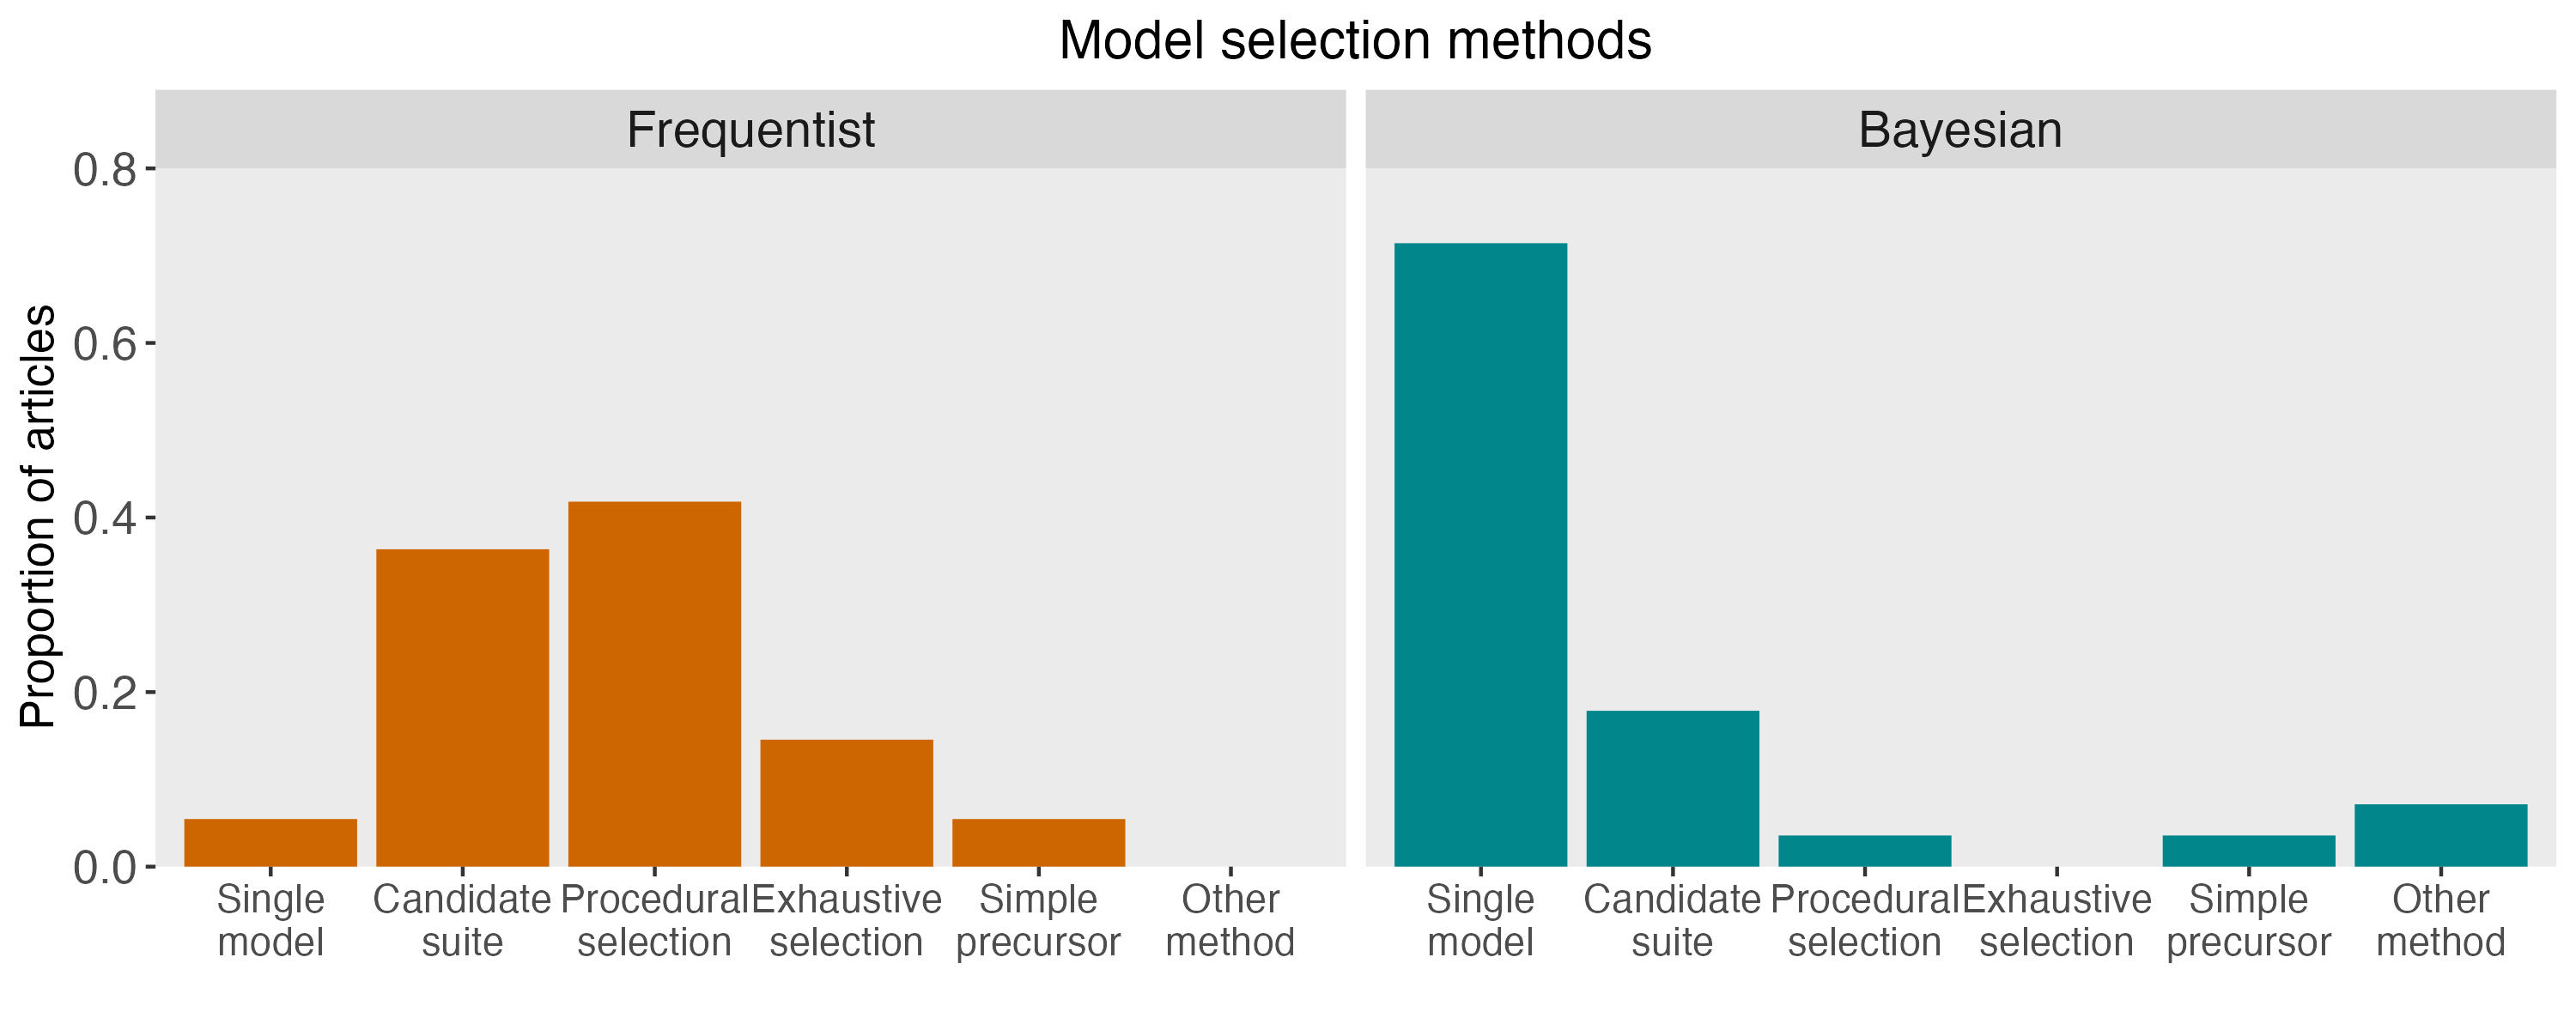
<figcaption>Figure 6: Frequency of use for model selection methods. ‘Single model’ indicates no model selection occurred, ‘candidate suite’ includes studies which compared a predefined set of models, articles with ‘procedural selection’ fit parameters one-by-one, ‘exhaustive selection’ fit all possible combinations of models, and ‘simple precursor’ describes where results of a less-complex model were used to inform covariate choice.</figcaption>
</figure>

Model selection is a particularly challenging aspect of fitting DOMs, with substantial uncertainties in the best ways to conduct the process. Limited research has been conducted on the topic, but what has been done has indicated that choices in this process can influence the quality of model outputs ([Morin et al., 2020](#ref-morin2020)). This is reflected in research from outside the DOM literature, where stepwise protocols have been found to be unreliable ([Olden & Jackson, 2000](#ref-olden2000)). However, others have found that different model selection methods can end up arriving at roughly the same answer ([Maggini et al., 2006](#ref-maggini2006)). Model selection can be particularly difficult for DOMs given the increased complexity of the underlying model structure, which will often preclude exhaustive selection from amongst all possibilities.

Bayesian model selection is an effectively distinct question in DOMs as the framework is not well suited to the more conventional model selection methods. Hooten & Hobbs ([2015](#ref-hooten2015)) provides a guide to some of the possibilities for optimising Bayesian models, including the use of regularisation priors.

Some reviewed studies included substantially more complex model selection protocols.

### Model validation

Regardless of whether a model was implemented under the Bayesian or frequentist frameworks, evaluation of model fit or performance was rare. Only 8% of articles directly addressed either aspect of modelling, be it via goodness-of-fit tests or validation with either internal or external data. This is a striking departure from the SDM literature, where roughly half of studies sufficiently assess their models performance ([M. B. Araújo et al., 2019](#ref-araújo2019)). While the appropriate method of model evaluation may depend on data availability and research objectives, assessing models by some method is always important to ensure reliability of model outputs ([M. Araújo et al., 2005](#ref-araújo2005); [Guisan & Thuiller, 2005](#ref-guisan2005)). Most models in our sample conduct model selection using AIC as a scoring criteria, and often using model averages. While these approaches provide *relative* models of fit, they cannot be considered evaluation themselves - as MacKenzie & Bailey ([2004](#ref-mackenzie2004)) write, “the selection of a ‘best’ model(s) does not guarantee the selection of a”good” model.

The first goodness-of-fit (GOF) test for occupancy model was given in MacKenzie & Bailey ([2004](#ref-mackenzie2004)), implemented via a parametric bootstrap. There is no GOF test available for DOM, however, common packages including ‘AICcModAvg’ and ‘unmarked’ offer parametric bootstraps derived from MacKenzie & Bailey ([2004](#ref-mackenzie2004))’s test which have been used by some authors in our sample. While these tests may not suit Bayesian implementations, Broms et al. ([2016](#ref-broms2016)) discusses possibilities for model evaluation in that context - while their article focuses on single-season multi-species occupancy models, extensions of their approach may suit the dynamic multi-season model as well.

All aspects of modelling varied with the stated objectives of articles (<a href="#tbl-objectives" class="quarto-xref">Table 2</a>). Those focussed on making predictions and identifying drivers of occupancy were more likely to consider a larger number of covariates and represented covariates in more complex ways by considering non-linear responses and interactions between covariates. Articles with objectives involving methods development considered fewer covariates and were less likely to use these more complex formulations.

``` r
objTable <- read_csv("Figures/ObjectiveTable.csv")
```

    Rows: 6 Columns: 8
    ── Column specification ────────────────────────────────────────────────────────
    Delimiter: ","
    chr (1): Objective
    dbl (7): Articles, ArticlesProp, MedianCovs, ProbPoly, ProbInt, ProbEval, Pr...

    ℹ Use `spec()` to retrieve the full column specification for this data.
    ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

``` r
objTable |>
  mutate(Objective = fct(Objective,
                         levels = c("Hypothesis", "Drivers", "Parameters",
                                    "Methods", "Predict", "Any"))) |>
  arrange(Objective) |>
  mutate(Objective = case_when(Objective == "Hypothesis" ~ "Testing hypotheses",
                               Objective == "Drivers" ~ "Identifying drivers",
                               Objective == "Predict" ~ "Making predictions",
                               Objective == "Methods" ~ "Developing methods",
                               Objective == "Parameters" ~ "Estimating parameters",
                               Objective == "Any" ~ "Any objective")) |>
  gt(rowname_col = "Objective") |>
  tab_spanner(label = "Articles",
              columns = c("Articles", "ArticlesProp"),
              id = "articles") |>
  tab_spanner(label = "Percent which have:",
              columns = c("ProbPoly", "ProbInt",
                          "ProbEval", "ProbSelect"),
              id = "percents") |>
  cols_label(Articles = "n", ArticlesProp = "%",
             MedianCovs = "Median covariates considered",
             ProbPoly = "Non-linear responses",
             ProbInt = "Covariate interactions",
             ProbSelect = "Model selection",
             ProbEval = "Model evaluation / goodness of fit") |>
  fmt_percent(columns = c(ArticlesProp, 
                          ProbPoly, ProbInt, 
                          ProbEval, ProbSelect),
              decimals = 0) |>
  tab_style(style = list(cell_fill(color = "gray80"),
                         cell_text(style = "italic")),
            locations = cells_body(rows = Objective == "Any objective")) |>
  tab_style(style = cell_fill(color = "lavender"),
            locations = cells_body(columns = MedianCovs,
                                   rows = MedianCovs == max(MedianCovs, na.rm = TRUE))) |>
  tab_style(style = cell_fill(color = "lavender"),
            locations = cells_body(columns = ProbPoly,
                                   rows = ProbPoly == max(ProbPoly, na.rm = TRUE))) |>
  tab_style(style = cell_fill(color = "lavender"),
            locations = cells_body(columns = ProbInt,
                                   rows = ProbInt == max(ProbInt, na.rm = TRUE))) |>
  tab_style(style = cell_fill(color = "lavender"),
            locations = cells_body(columns = ProbEval,
                                   rows = ProbEval == max(ProbEval, na.rm = TRUE))) |>
  tab_style(style = cell_fill(color = "lavender"),
            locations = cells_body(columns = ProbSelect,
                                   rows = ProbSelect == max(ProbSelect, na.rm = TRUE))) |>
  as_raw_html()
```

<div id="tfyxcqegjq" style="padding-left:0px;padding-right:0px;padding-top:10px;padding-bottom:10px;overflow-x:auto;overflow-y:auto;width:auto;height:auto;">
  
  

|  | <span class="gt_column_spanner" style="border-bottom-style: solid; border-bottom-width: 2px; border-bottom-color: #D3D3D3; vertical-align: bottom; padding-top: 5px; padding-bottom: 5px; overflow-x: hidden; display: inline-block; width: 100%;">Articles</span> |  | Median covariates considered | <span class="gt_column_spanner" style="border-bottom-style: solid; border-bottom-width: 2px; border-bottom-color: #D3D3D3; vertical-align: bottom; padding-top: 5px; padding-bottom: 5px; overflow-x: hidden; display: inline-block; width: 100%;">Percent which have:</span> |  |  |  |
|:---|---:|---:|---:|---:|---:|---:|---:|
|  | n | % |  | Non-linear responses | Covariate interactions | Model evaluation / goodness of fit | Model selection |
| Testing hypotheses | 42 | 50% | 12.5 | 21% | 29% | 10% | 79% |
| Identifying drivers | 26 | 31% | 17.5 | 31% | 23% | 8% | 85% |
| Estimating parameters | 25 | 30% | 10.0 | 24% | 20% | 8% | 84% |
| Developing methods | 24 | 29% | 4.5 | 17% | 17% | 4% | 54% |
| Making predictions | 8 | 10% | 17.0 | 25% | 38% | 0% | 88% |
| Any objective | 84 | 100% | 11.0 | 23% | 23% | 8% | 73% |

</div>

Table 2: Implementation of models by study objective. Models were assessed based on the number of covariates considered, the inclusion of non-linear responses and interactions between covaraites, the manner of model selection, and whether or not they objectively evaluated model performance.

# Conclusions and key considerations

Our review highlights the dynamic occupancy model’s exceptional flexibility and suitability to addressing a range of ecological questions. The DOM may be a more achievable option than many think with feasible options to incorporate much existing presence/absence data from a variety of sources. Fertile areas for future research remain, with methods and guidance for making predictions and for modelling autonomous detection data from camera-traps and acoustic monitors particularly promising opportunities. In light of this potential and the DOMs status as a popular tool for applied ecology, it is increasingly important that best-practice standards be established for building these models. Major questions remain on fundamental questions in model building — there is need for further research on the appropriate levels of complexity for DOMs in various scenarios, on the methods for selecting models from amongst candidates, and on the best ways to evaluate the quality of the models chosen. In these areas, DOMs lag well behind SDMs where these standards have been more seriously considered ([M. B. Araújo et al., 2019](#ref-araújo2019); [M. B. Araújo & Guisan, 2006](#ref-araújo2006); [Zurell et al., 2020](#ref-zurell2020)). Given the parallels between these model classes, we may be able to extrapolate some lessons from SDMs to support building better DOMs. In light of these uncertainties, and based upon existing research on SDMs, we discuss some key considerations for authors seeking to use DOMs in their work:

1.  **Are key drivers of occupancy and detection incorporated?** While it is effectively impossible to *fully* describe heterogeneity across a landscape, authors should make their best efforts to capture the drivers of occupancy and detection most likely to influence their study species. This is true even when another covariate is of principal interest to investigators — failure to include other major determinants of occupancy is likely to bias parameter estimates. One place where this is of particular importance is in determining drivers of detection, which is not only subject to observational conditions but also ecological determinants which may cause the species to spend more time at a location and thus be more frequently available for detection.

2.  **Do covariates relationships reflect ecological complexity?** Many ecological relationships are non-linear and may require polynomial terms to be accurately represented. This is particularly true at large spatial scales where a larger portion of a species ecological niche is represented in surveyed data. Authors should question whether a linear term is sufficient to capture hypothetical relationships in their study systems, and consider representing species responses as polynomials terms where appropriate. Interactions between covariates should also be explored where a plausible ecological relationship between factors exists.

3.  **How should model evaluation be conducted?** Regardless of why a model is used, it is important to assess its quality and its ability to support the conclusions drawn from it. While more research is needed on the most robust ways to assess models, existing methods should be used and reported in published studies. Dependent on data availability and model objectives, this can be achieved through bootstrapped goodness-of-fit tests or metrics of predictive performance on reserved data. This is an important step in establishing best-practices for the field, and should realistically be conducted in some form for the vast majority of studies.

As previously stated, DOMs and their outputs are important — in a biodiversity and conservation context where quantitative representations of complex natural systems are used to guide policy and decision making, it is necessary to ensure models can be trusted. We hope that this review can open a broader discussion on how to best approach dynamic occupancy modelling as a first step towards establishing best practices in the discipline.

Araújo, M. B., Anderson, R. P., Márcia Barbosa, A., Beale, C. M., Dormann, C. F., Early, R., Garcia, R. A., Guisan, A., Maiorano, L., Naimi, B., O’Hara, R. B., Zimmermann, N. E., & Rahbek, C. (2019). Standards for distribution models in biodiversity assessments. *Science Advances*, *5*(1), eaat4858. <https://doi.org/10.1126/sciadv.aat4858>

Araújo, M. B., & Guisan, A. (2006). Five (or so) challenges for species distribution modelling. *Journal of Biogeography*, *33*(10), 1677–1688. <https://doi.org/10.1111/j.1365-2699.2006.01584.x>

Araújo, M., Pearson, R., Thuiller, W., & Erhard, M. (2005). Validation of species-climate impact models under climate change. *Global Change Biology*, *11*, 1504–1513. <https://doi.org/10.1111/j.1365-2486.2005.01000.x>

Austin, M. (2007). Species distribution models and ecological theory: A critical assessment and some possible new approaches. *Ecological Modelling*, *200*(1), 1–19. <https://doi.org/10.1016/j.ecolmodel.2006.07.005>

Austin, M. P. (2002). Spatial prediction of species distribution: An interface between ecological theory and statistical modelling. *Ecological Modelling*, *157*(2), 101–118. <https://doi.org/10.1016/S0304-3800(02)00205-3>

Bailey, L. L., MacKenzie, D. I., & Nichols, J. D. (2014). Advances and applications of occupancy models. *Methods in Ecology and Evolution*, *5*(12), 1269–1279. <https://doi.org/10.1111/2041-210X.12100>

Balantic, C., & Donovan, T. (2019). Dynamic wildlife occupancy models using automated acoustic monitoring data. *Ecological Applications*, *29*(3). <https://doi.org/10.1002/eap.1854>

Barry, S., & Elith, J. (2006). Error and uncertainty in habitat models. *Journal of Applied Ecology*, *43*(3), 413–423. <https://doi.org/10.1111/j.1365-2664.2006.01136.x>

Basset, Y., Butterill, P. T., Donoso, D. A., P. A. Lamarre, G., Souto-Vilarós, D., Perez, F., Bobadilla, R., Lopez, Y., Alejandro Ramírez Silva, J., & Barrios, H. (2023). Abundance, occurrence and time series: Long-term monitoring of social insects in a tropical rainforest. *Ecological Indicators*, *150*, 110243. <https://doi.org/10.1016/j.ecolind.2023.110243>

Belinchón, R., Harrison, P. J., Mair, L., Várkonyi, G., & Snäll, T. (2017). Local epiphyte establishment and future metapopulation dynamics in landscapes with different spatiotemporal properties. *Ecology*, *98*(3), 741–750. <https://doi.org/10.1002/ecy.1686>

Berigan, W. J., Jones, G. M., Whitmore, S. A., Gutiérrez, R. J., & Peery, M. Z. (2019). Cryptic wide-ranging movements lead to upwardly biased occupancy in a territorial species. *Journal of Applied Ecology*, *56*(2), 470–480. <https://doi.org/10.1111/1365-2664.13265>

Bertelsmeier, C., Luque, G. M., & Courchamp, F. (2013). Increase in Quantity and Quality of Suitable Areas for Invasive Species as Climate Changes. *Conservation Biology*, *27*(6), 1458–1467. <https://doi.org/10.1111/cobi.12093>

Briscoe, N. J., Zurell, D., Elith, J., König, C., Fandos, G., Malchow, A.-K., Kéry, M., Schmid, H., & Guillera-Arroita, G. (2021). Can dynamic occupancy models improve predictions of species’ range dynamics? A test using Swiss birds. *Global Change Biology*, *27*(18), 4269–4282. <https://doi.org/10.1111/gcb.15723>

Broms, K. M., Hooten, M. B., Johnson, D. S., Altwegg, R., & Conquest, L. L. (2016). Dynamic occupancy models for explicit colonization processes. *Ecology*, *97*(1), 194–204. <https://doi.org/10.1890/15-0416.1>

Burnham, K. P., & Anderson, D. R. (2004). *Model Selection and Multimodel Inference*. Springer. <https://doi.org/10.1007/b97636>

Carvalho, E. a. R., Mendonça, E. N., Lopes, A. M. C., & Haugaasen, T. (2023). Current status of the Critically Endangered Black-winged Trumpeter Psophia obscura in one of its last strongholds. *Bird Conservation International*, *33*, e12. <https://doi.org/10.1017/S0959270922000077>

Chave, J. (2013). The problem of pattern and scale in ecology: what have we learned in 20 years? *Ecology Letters*, *16*(s1), 4–16. <https://doi.org/10.1111/ele.12048>

Chen, G., Kéry, M., Plattner, M., Ma, K., & Gardner, B. (2013). Imperfect detection is the rule rather than the exception in plant distribution studies. *Journal of Ecology*, *101*(1), 183–191. <https://doi.org/10.1111/1365-2745.12021>

Clement, M. J., Nichols, J. D., Collazo, J. A., Terando, A. J., Hines, J. E., & Williams, S. G. (2019). Partitioning global change: Assessing the relative importance of changes in climate and land cover for changes in avian distribution. *Ecology and Evolution*, *9*(4), 1985–2003. <https://doi.org/10.1002/ece3.4890>

Cook, J. D., Williams, D. M., Porter, W. F., & Christensen, S. A. (2022). Improved predictions and forecasts of chronic wasting disease occurrence using multiple mechanism dynamic occupancy modeling. *The Journal of Wildlife Management*, *86*(7), e22296. <https://doi.org/10.1002/jwmg.22296>

Davis, A. J., McCreary, R., Psiropoulos, J., Brennan, G., Cox, T., Partin, A., & Pepin, K. M. (2018). Quantifying site-level usage and certainty of absence for an invasive species through occupancy analysis of camera-trap data. *Biological Invasions*, *20*(4), 877–890. <https://doi.org/10.1007/s10530-017-1579-x>

Devarajan, K., Morelli, T. L., & Tenan, S. (2020). Multi-species occupancy models: review, roadmap, and recommendations. *Ecography*, *43*(11), 1612–1624. <https://doi.org/10.1111/ecog.04957>

Doherty, P. F., White, G. C., & Burnham, K. P. (2012). Comparison of model building and selection strategies. *Journal of Ornithology*, *152*(2), 317–323. <https://doi.org/10.1007/s10336-010-0598-5>

Dorazio, R. M., Kéry, M., Royle, J. A., & Plattner, M. (2010). Models for inference in dynamic metacommunity systems. *Ecology*, *91*(8), 2466–2475. <https://doi.org/10.1890/09-1033.1>

Dormann, C. F. (2007). Promising the future? Global change projections of species distributions. *Basic and Applied Ecology*, *8*(5), 387–397. <https://doi.org/10.1016/j.baae.2006.11.001>

Elith, J., Kearney, M., & Phillips, S. (2010). The art of modelling range-shifting species. *Methods in Ecology and Evolution*, *1*(4), 330–342. <https://doi.org/10.1111/j.2041-210X.2010.00036.x>

Elith, J., Leathwick, J. R., & Hastie, T. (2008). A working guide to boosted regression trees. *Journal of Animal Ecology*, *77*(4), 802–813. <https://doi.org/10.1111/j.1365-2656.2008.01390.x>

Evans, M. R., Grimm, V., Johst, K., Knuuttila, T., Langhe, R. de, Lessells, C. M., Merz, M., O’Malley, M. A., Orzack, S. H., Weisberg, M., Wilkinson, D. J., Wolkenhauer, O., & Benton, T. G. (2013). Do simple models lead to generality in ecology? *Trends in Ecology & Evolution*, *28*(10), 578–583. <https://doi.org/10.1016/j.tree.2013.05.022>

Falke, J. A., Bailey, L. L., Fausch, K. D., & Bestgen, K. R. (2012). Colonization and extinction in dynamic habitats: an occupancy approach for a Great Plains stream fish assemblage. *Ecology*, *93*(4), 858–867. <https://doi.org/10.1890/11-1515.1>

Fidino, M., Simonis, J. L., & Magle, S. B. (2019). A multistate dynamic occupancy model to estimate local colonizationextinction rates and patterns of co-occurrence between two or more interacting species. *Methods in Ecology and Evolution*, *10*(2), 233–244. <https://doi.org/10.1111/2041-210X.13117>

Fisher, A. C., Volpe, J. P., & Fisher, J. T. (2014). Occupancy dynamics of escaped farmed Atlantic salmon in Canadian Pacific coastal salmon streams: implications for sustained invasions. *Biological Invasions*, *16*(10), 2137–2146. <https://doi.org/10.1007/s10530-014-0653-x>

Gu, W., & Swihart, R. K. (2004). Absent or undetected? Effects of non-detection of species occurrence on wildlifehabitat models. *Biological Conservation*, *116*(2), 195–203. <https://doi.org/10.1016/S0006-3207(03)00190-3>

Guisan, A., Lehmann, A., Ferrier, S., Austin, M., Overton, J. Mc. C., Aspinall, R., & Hastie, T. (2006). Making better biogeographical predictions of species’ distributions. *Journal of Applied Ecology*, *43*(3), 386–392. <https://doi.org/10.1111/j.1365-2664.2006.01164.x>

Guisan, A., & Thuiller, W. (2005). Predicting species distribution: offering more than simple habitat models. *Ecology Letters*, *8*(9), 993–1009. <https://doi.org/10.1111/j.1461-0248.2005.00792.x>

Hendershot, J. N., Smith, J. R., Anderson, C. B., Letten, A. D., Frishkoff, L. O., Zook, J. R., Fukami, T., & Daily, G. C. (2020). Intensive farming drives long-term shifts in avian community composition. *Nature*, *579*(7799), 393–396. <https://doi.org/10.1038/s41586-020-2090-6>

Hooten, M. B., & Hobbs, N. T. (2015). A guide to Bayesian model selection for ecologists. *Ecological Monographs*, *85*(1), 3–28. <https://doi.org/10.1890/14-0661.1>

Humboldt, A. von. (1849). *Cosmos : a sketch of a physical description of the universe*.

Kellner, K. F., & Swihart, R. K. (2014). Accounting for Imperfect Detection in Ecology: A Quantitative Review. *PLOS ONE*, *9*(10), e111436. <https://doi.org/10.1371/journal.pone.0111436>

Kendall, W. L., Hines, J. E., Nichols, J. D., & Grant, E. H. C. (2013). Relaxing the closure assumption in occupancy models: staggered arrival and departure times. *Ecology*, *94*(3), 610–617. <https://doi.org/10.1890/12-1720.1>

Kéry, M., Guillera-Arroita, G., & Lahoz-Monfort, J. J. (2013). Analysing and mapping species range dynamics using occupancy models. *Journal of Biogeography*, *40*(8), 1463–1474. <https://doi.org/10.1111/jbi.12087>

Kleiven, E. F., Barraquand, F., Gimenez, O., Henden, J.-A., Ims, R. A., Soininen, E. M., & Yoccoz, N. G. (2020). *A dynamic occupancy model for interacting species with two spatial scales*. <https://doi.org/10.1101/2020.12.16.423067>

Lahoz-Monfort, J. J., Guillera-Arroita, G., & Wintle, B. A. (2014). Imperfect detection impacts the performance of species distribution models. *Global Ecology and Biogeography*, *23*(4), 504–515. <https://doi.org/10.1111/geb.12138>

Lenoir, J., & Svenning, J.-C. (2015). Climate-related range shifts a global multidimensional synthesis and new research directions. *Ecography*, *38*(1), 15–28. <https://doi.org/10.1111/ecog.00967>

Lesmeister, D. B., Nielsen, C. K., Schauber, E. M., & Hellgren, E. C. (2015). Spatial and temporal structure of a mesocarnivore guild in midwestern north America: Midwestern Carnivore Guild Structure. *Wildlife Monographs*, *191*(1), 1–61. <https://doi.org/10.1002/wmon.1015>

Lonergan, M. (2014). Data availability constrains model complexity, generality, and utility: A response to evans *et al.* *Trends in Ecology & Evolution*, *29*(6), 301–302. <https://doi.org/10.1016/j.tree.2014.03.005>

MacKenzie, D. I., & Bailey, L. L. (2004). Assessing the fit of site-occupancy models. *Journal of Agricultural, Biological, and Environmental Statistics*, *9*(3), 300–318. <https://doi.org/10.1198/108571104X3361>

MacKenzie, D. I., Nichols, J. D., Hines, J. E., Knutson, M. G., & Franklin, A. B. (2003). Estimating site occupancy, colonization, and local extinction when a species is detected imperfectly. *Ecology*, *84*(8), 2200–2207. <https://doi.org/10.1890/02-3090>

MacKenzie, D. I., Nichols, J. D., Lachman, G. B., Droege, S., Andrew Royle, J., & Langtimm, C. A. (2002). Estimating Site Occupancy Rates When Detection Probabilities Are Less Than One. *Ecology*, *83*(8), 2248–2255. [https://doi.org/10.1890/0012-9658(2002)083\[2248:ESORWD\]2.0.CO;2](https://doi.org/10.1890/0012-9658(2002)083[2248:ESORWD]2.0.CO;2)

MacKenzie, D. I., Nichols, James. D., Sutton, N., Kawanishi, K., & Bailey, L. L. (2005). Improving Inferences in Population Studies of Rare Species That Are Detected Imperfectly. *Ecology*, *86*(5), 1101–1113. <https://doi.org/10.1890/04-1060>

Maggini, R., Lehmann, A., Zimmermann, N. E., & Guisan, A. (2006). Improving generalized regression analysis for the spatial prediction of forest communities. *Journal of Biogeography*, *33*(10), 1729–1749. <https://www.jstor.org/stable/3838513>

Marescot, L., Lyet, A., Singh, R., Carter, N., & Gimenez, O. (2020). Inferring wildlife poaching in southeast Asia with multispecies dynamic occupancy models. *Ecography*, *43*(2), 239–250. <https://doi.org/10.1111/ecog.04536>

McClintock, B. T., Bailey, L. L., Pollock, K. H., & Simons, T. R. (2010). Unmodelred observation error induces bias when inferring patterns and dynamics of species occurrence via aural detections. *Ecology*, *91*(8), 2446–2454. <https://www.jstor.org/stable/27860809>

McGowan, C. P., Angeli, N., Beisler, W., Snyder, C. W., Rankin, N. M., Woodrow, J., Wilson, J., Rivenbark, E., Schwarzer, A., Hand, C., Anthony, R. M., Griffin, R., Barrett, K., Haverland, A., Roach, N., Schneider, T., Smith, A. J., Smith, F., Tolliver, J., & Watts, B. D. (2020). Linking monitoring and data analysis to predictions and decisions for the range-wide eastern black rail status assessment. *Endangered Species Research*, *43*, 209–222. <https://doi.org/10.3354/esr01063>

Merow, C., Smith, M. J., Edwards Jr, T. C., Guisan, A., McMahon, S. M., Normand, S., Thuiller, W., Wüest, R. O., Zimmermann, N. E., & Elith, J. (2014). What do we gain from simplicity versus complexity in species distribution models? *Ecography*, *37*(12), 1267–1281. <https://doi.org/10.1111/ecog.00845>

Merow, C., Smith, M. J., & Silander Jr, J. A. (2013). A practical guide to MaxEnt for modeling species’ distributions: what it does, and why inputs and settings matter. *Ecography*, *36*(10), 1058–1069. <https://doi.org/10.1111/j.1600-0587.2013.07872.x>

Miller, D. A. W., Bailey, L. L., Grant, E. H. C., McClintock, B. T., Weir, L. A., & Simons, T. R. (2015). Performance of species occurrence estimators when basic assumptions are not met: a test using field data where true occupancy status is known. *Methods in Ecology and Evolution*, *6*(5), 557–565. <https://doi.org/10.1111/2041-210X.12342>

Miller, D., Nichols, J., Mcclintock, B., Grant, E., Bailey, L., & Weir, L. (2011). Improving occupancy estimation when two types of observational error occur: Non-detection and species misidentification. *Ecology*, *92*, 1422–1428. <https://doi.org/10.2307/23035095>

Mölle, J. P., Kleiven, E. F., Ims, R. A., & Soininen, E. M. (2022). Using subnivean camera traps to study arctic small mammal community dynamics during winter. *Arctic Science*, *8*(1), 183–199. <https://doi.org/10.1139/as-2021-0006>

Mores, G. B., Schuler-Faccini, L., Hasenack, H., Fetzer, L. O., Souza, G. D., & Ferraz, G. (2020). Site Occupancy by Aedes aegypti in a Subtropical City is Most Sensitive to Control during Autumn and Winter Months. *The American Journal of Tropical Medicine and Hygiene*, *103*(1), 445–454. <https://doi.org/10.4269/ajtmh.19-0366>

Morin, D. J., Yackulic, C. B., Diffendorfer, J. E., Lesmeister, D. B., Nielsen, C. K., Reid, J., & Schauber, E. M. (2020). Is your ad hoc model selection strategy affecting your multimodel inference? *Ecosphere*, *11*(1), e02997. <https://doi.org/10.1002/ecs2.2997>

Nichols, J. D., Hines, J. E., Mackenzie, D. I., Seamans, M. E., & Gutiérrez, R. J. (2007). Occupancy estimation and modeling with multiple states and state uncertainty. *Ecology*, *88*(6), 1395–1400. <https://www.jstor.org/stable/27651247>

Olden, J. D., & Jackson, D. A. (2000). Torturing data for the sake of generality: How valid are our regression models? *Écoscience*, *7*(4), 501510. <https://doi.org/10.1080/11956860.2000.11682622>

Otto, C. R. V., Bailey, L. L., & Roloff, G. J. (2013). Improving species occupancy estimation when sampling violates the closure assumption. *Ecography*, *36*(12), 1299–1309. <https://doi.org/10.1111/j.1600-0587.2013.00137.x>

Otto, C. R. V., & Roloff, G. J. (2012). Songbird response to green-tree retention prescriptions in clearcut forests. *Forest Ecology and Management*, *284*, 241–250. <https://doi.org/10.1016/j.foreco.2012.07.016>

Padilla-Torres, S. D., Ferraz, G., Luz, S. L. B., Zamora-Perea, E., & Abad-Franch, F. (2013). Modeling Dengue Vector Dynamics under Imperfect Detection: Three Years of Site-Occupancy by Aedes aegypti and Aedes albopictus in Urban Amazonia. *PLoS ONE*, *8*(3), e58420. <https://doi.org/10.1371/journal.pone.0058420>

Peach, M. A., Cohen, J. B., Frair, J. L., Zuckerberg, B., Sullivan, P., Porter, W. F., & Lang, C. (2019). Value of protected areas to avian persistence across 20 years of climate and land-use change. *Conservation Biology*, *33*(2), 423–433. <https://doi.org/10.1111/cobi.13205>

Pendleton, D. E., Tingley, M. W., Ganley, L. C., Friedland, K. D., Mayo, C., Brown, M. W., McKenna, B. E., Jordaan, A., & Staudinger, M. D. (2022). Decadal-scale phenology and seasonal climate drivers of migratory baleen whales in a rapidly warming marine ecosystem. *Global Change Biology*, *28*(16), 4989–5005. <https://doi.org/10.1111/gcb.16225>

Pitman, R. T., Fattebert, J., Williams, S. T., Williams, K. S., Hill, R. A., Hunter, L. T. B., Robinson, H., Power, J., Swanepoel, L., Slotow, R., & Balme, G. A. (2017). Cats, connectivity and conservation: incorporating data sets and integrating scales for wildlife management. *Journal of Applied Ecology*, *54*(6), 1687–1698. <https://doi.org/10.1111/1365-2664.12851>

Pollentier, C. D., Hardy, M. A., Lutz, R. S., Hull, S. D., & Zuckerberg, B. (2021). Gobbling across landscapes: Eastern wild turkey distribution and occupancyhabitat associations. *Ecology and Evolution*, *11*(24), 18248–18270. <https://doi.org/10.1002/ece3.8419>

Riddell, E. A., Iknayan, K. J., Hargrove, L., Tremor, S., Patton, J. L., Ramirez, R., Wolf, B. O., & Beissinger, S. R. (2021). Exposure to climate change drives stability or collapse of desert mammal and bird communities. *Science*, *371*(6529), 633–636. <https://doi.org/10.1126/science.abd4605>

Rota, C. T., Fletcher Jr, R. J., Dorazio, R. M., & Betts, M. G. (2009). Occupancy estimation and the closure assumption. *Journal of Applied Ecology*, *46*(6), 1173–1181. <https://doi.org/10.1111/j.1365-2664.2009.01734.x>

Royle, J. A., & Link, W. A. (2006). GENERALIZED SITE OCCUPANCY MODELS ALLOWING FOR FALSE POSITIVE AND FALSE NEGATIVE ERRORS. *Ecology*, *87*(4), 835–841. [https://doi.org/10.1890/0012-9658(2006)87\[835:GSOMAF\]2.0.CO;2](https://doi.org/10.1890/0012-9658(2006)87[835:GSOMAF]2.0.CO;2)

Stevens, B. S., & Conway, C. J. (2019). Identifying important military installations for continental-scale conservation of marsh bird breeding habitat. *Journal of Environmental Management*, *252*, 109664. <https://doi.org/10.1016/j.jenvman.2019.109664>

Valente, J. J., Hutchinson, R. A., & Betts, M. G. (2017). Distinguishing distribution dynamics from temporary emigration using dynamic occupancy models. *Methods in Ecology and Evolution*, *8*(12), 1707–1716. <https://doi.org/10.1111/2041-210X.12840>

Warrier, R., Noon, B. R., & Bailey, L. (2020). Agricultural lands offer seasonal habitats to tigers in a human-dominated and fragmented landscape in India. *Ecosphere*, *11*(7). <https://doi.org/10.1002/ecs2.3080>

Wood, C. M., Gutiérrez, R. J., Keane, J. J., & Peery, M. Z. (2020). Early detection of rapid Barred Owl population growth within the range of the California Spotted Owl advises the Precautionary Principle. *The Condor*, *122*(1), duz058. <https://doi.org/10.1093/condor/duz058>

Zuckerberg, B., Bonter, D. N., Hochachka, W. M., Koenig, W. D., DeGaetano, A. T., & Dickinson, J. L. (2011). Climatic constraints on wintering bird distributions are modified by urbanization and weather: Wintering birds, weather, food, and climate. *Journal of Animal Ecology*, *80*(2), 403–413. <https://doi.org/10.1111/j.1365-2656.2010.01780.x>

Zurell, D., Franklin, J., König, C., Bouchet, P. J., Dormann, C. F., Elith, J., Fandos, G., Feng, X., Guillera-Arroita, G., Guisan, A., Lahoz-Monfort, J. J., Leitão, P. J., Park, D. S., Peterson, A. T., Rapacciuolo, G., Schmatz, D. R., Schröder, B., Serra-Diaz, J. M., Thuiller, W., … Merow, C. (2020). A standard protocol for reporting species distribution models. *Ecography*, *43*(9), 1261–1277. <https://doi.org/10.1111/ecog.04960>